In [124]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns  

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ridge_regression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
bike_df = pd.read_csv('data/BikeRentalData.csv', encoding= 'unicode_escape', parse_dates=[0])

## Exploring Data Set

In [3]:
bike_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-01-12                254     0             -5.2           37   
1 2017-01-12                204     1             -5.5           38   
2 2017-01-12                173     2             -6.0           39   
3 2017-01-12                107     3             -6.2           40   
4 2017-01-12                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [11]:
bike_df.shape

(8760, 14)

### Total of 8760 records with 14 features found in dataset

In [12]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

#### date type understanding
#### one date time
#### four features of integer data type
#### six features of float data type
#### three features are in object data type 


#### below are numerical features
#### -------------------------------------------
#### Rented Bike Count, Hour , Temperatures, Humidity, Wind Speed, Visibility, Dew point Temperatures, solar radiation, rainfall, and snowfall.
#### below are Categorical features
#### -------------------------------------------
#### Season, Holliday, Functioning day


#### Target Variable
#### --------------------
#### Rented Bike Count
#### Input Variable 
#### --------------------
#### Date, Hour , Temperatures, Humidity, Wind Speed, Visibility, Dew point Temperatures, solar radiation, rainfall, snowfall, Season, Holliday, Functioning day.

In [17]:
# description of numerical variables and catagorical variables
bike_df.describe(include='all').T                    # T is for transpose 

count unique                  top  freq  \
Date                         8760    365  2017-01-12 00:00:00    24   
Rented Bike Count          8760.0    NaN                  NaN   NaN   
Hour                       8760.0    NaN                  NaN   NaN   
Temperature(°C)            8760.0    NaN                  NaN   NaN   
Humidity(%)                8760.0    NaN                  NaN   NaN   
Wind speed (m/s)           8760.0    NaN                  NaN   NaN   
Visibility (10m)           8760.0    NaN                  NaN   NaN   
Dew point temperature(°C)  8760.0    NaN                  NaN   NaN   
Solar Radiation (MJ/m2)    8760.0    NaN                  NaN   NaN   
Rainfall(mm)               8760.0    NaN                  NaN   NaN   
Snowfall (cm)              8760.0    NaN                  NaN   NaN   
Seasons                      8760      4               Spring  2208   
Holiday                      8760      2           No Holiday  8328   
Functioning Day              8760      2                  Yes  8465   

                               first       last         mean         std  \
Date                      2017-01-12 2018-12-11          NaN         NaN   
Rented Bike Count                NaT        NaT   704.602055  644.997468   
Hour                             NaT        NaT         11.5    6.922582   
Temperature(°C)                  NaT        NaT    12.882922   11.944825   
Humidity(%)                      NaT        NaT    58.226256   20.362413   
Wind speed (m/s)                 NaT        NaT     1.724909      1.0363   
Visibility (10m)                 NaT        NaT  1436.825799  608.298712   
Dew point temperature(°C)        NaT        NaT     4.073813   13.060369   
Solar Radiation (MJ/m2)          NaT        NaT     0.569111    0.868746   
Rainfall(mm)                     NaT        NaT     0.148687    1.128193   
Snowfall (cm)                    NaT        NaT     0.075068    0.436746   
Seasons                          NaT        NaT          NaN         NaN   
Holiday                          NaT        NaT          NaN         NaN   
Functioning Day                  NaT        NaT          NaN         NaN   

                            min    25%     50%      75%     max  
Date                        NaN    NaN     NaN      NaN     NaN  
Rented Bike Count           0.0  191.0   504.5  1065.25  3556.0  
Hour                        0.0   5.75    11.5    17.25    23.0  
Temperature(°C)           -17.8    3.5    13.7     22.5    39.4  
Humidity(%)                 0.0   42.0    57.0     74.0    98.0  
Wind speed (m/s)            0.0    0.9     1.5      2.3     7.4  
Visibility (10m)           27.0  940.0  1698.0   2000.0  2000.0  
Dew point temperature(°C) -30.6   -4.7     5.1     14.8    27.2  
Solar Radiation (MJ/m2)     0.0    0.0    0.01     0.93    3.52  
Rainfall(mm)                0.0    0.0     0.0      0.0    35.0  
Snowfall (cm)               0.0    0.0     0.0      0.0     8.8  
Seasons                     NaN    NaN     NaN      NaN     NaN  
Holiday                     NaN    NaN     NaN      NaN     NaN  
Functioning Day             NaN    NaN     NaN      NaN     NaN

### Preprocessing The Data

In [18]:
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

####  No missing values found above

####  Check for any missing values

In [20]:
bike_df.duplicated().sum()

0

In [21]:
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

### Feature engineering on Date column

In [22]:
bike_df['year'] = bike_df['Date'].map(lambda x: x.year).astype('object')       
bike_df['month'] = bike_df['Date'].dt.month_name()                             
bike_df['day'] = bike_df['Date'].dt.day_name()   

### date column can be dropped

In [23]:
bike_df.drop(columns=['Date'], inplace=True)

In [24]:
bike_df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  year  \
0           0.0            0.0  Winter  No Holiday             Yes  2017   
1           0.0            0.0  Winter  No Holiday             Yes  2017   
2           0.0            0.0  Winter  No Holiday             Yes  2017   
3           0.0            0.0  Winter  No Holiday             Yes  2017   
4           0.0            0.0  Winter  No Holiday             Yes  2017   

     month       day  
0  January  Thursday  
1  January  Thursday  
2  January  Thursday  
3  January  Thursday  
4  January  Thursday

In [25]:
bike_df.shape

(8760, 16)

### Data Visualization

#### how the features are related with each other

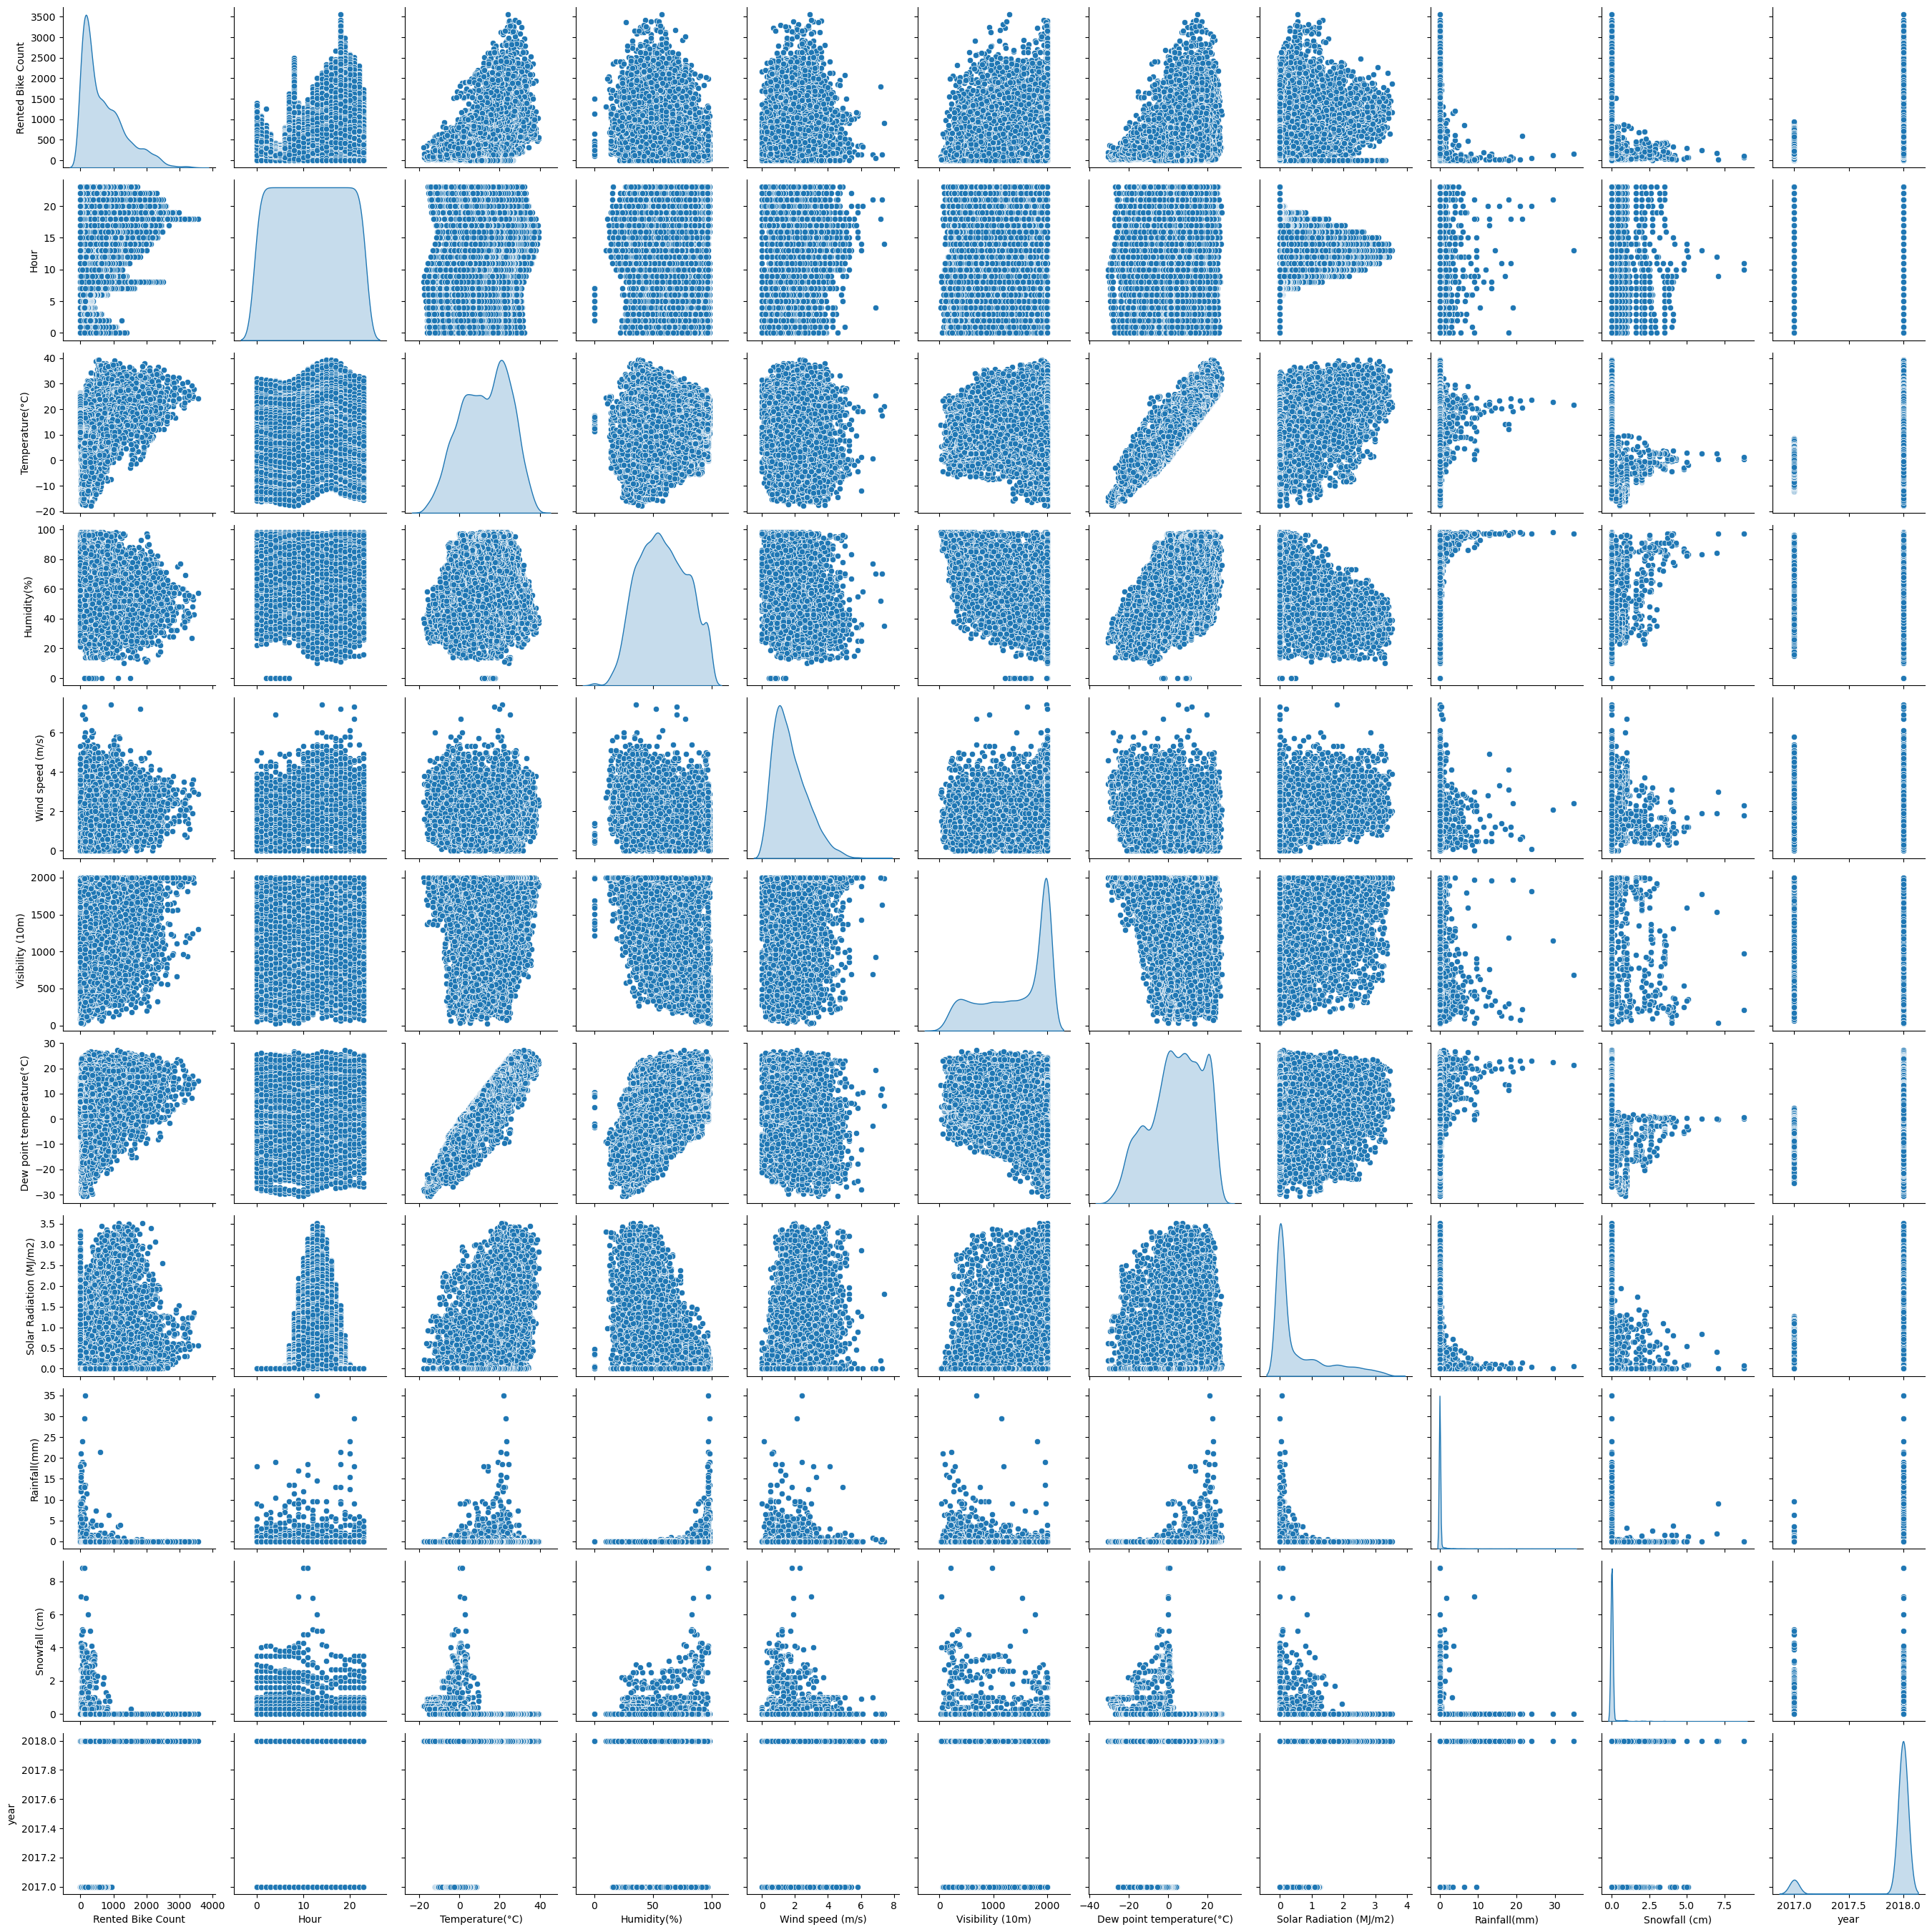

In [26]:
sns.pairplot(bike_df, diag_kind= 'kde')   

In [27]:
bike_df['Hour']= bike_df['Hour'].astype('object')    # converting numerical Hour column datatype into categorical column

In [28]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   object 
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  year                       8760 non-null   objec

#### identify how many Numerical Features && Categorical Features


In [30]:
numeric_features = bike_df.describe().columns
categorical_features = bike_df.describe(include=['object','category']).columns

In [31]:
numeric_features

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [32]:
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'year', 'month',
       'day'],
      dtype='object')

#### Analyze Categorical features

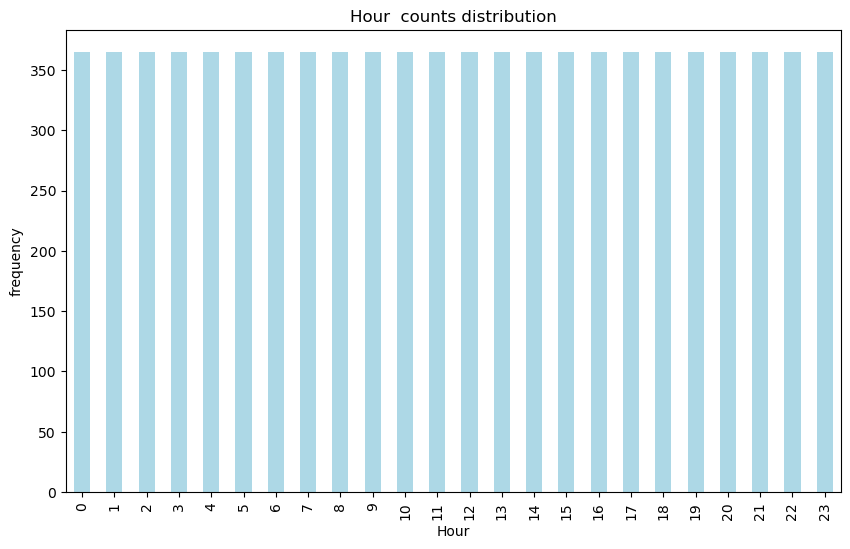

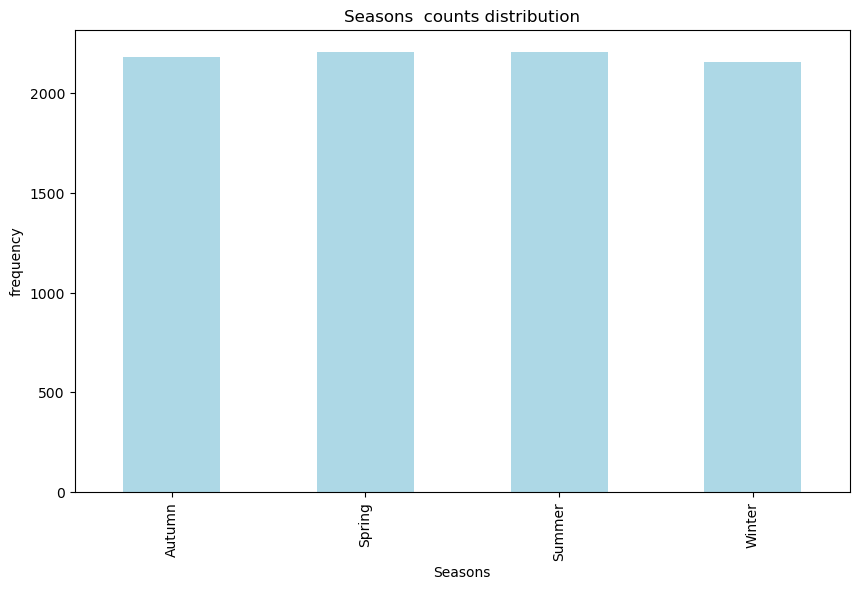

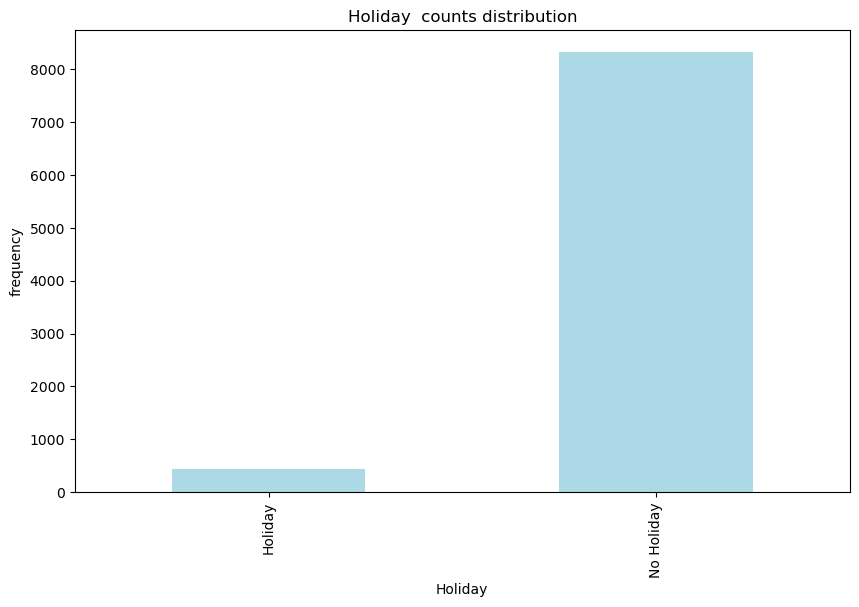

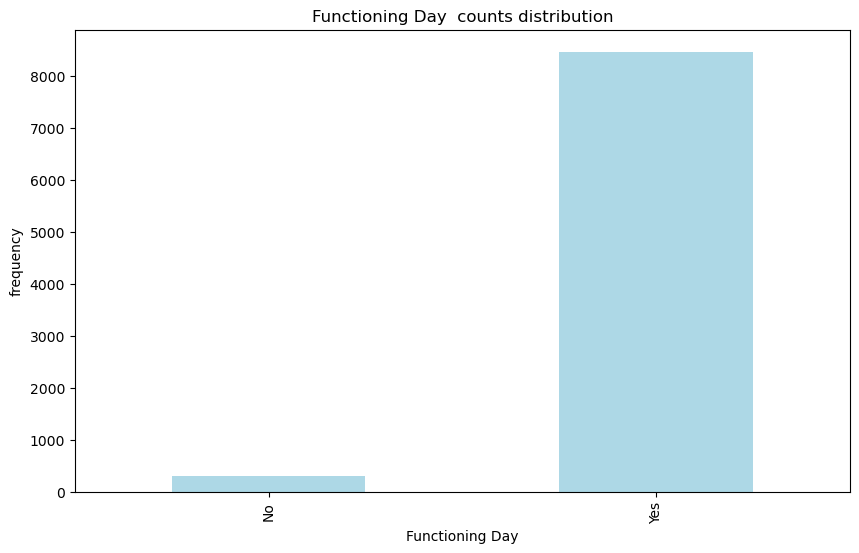

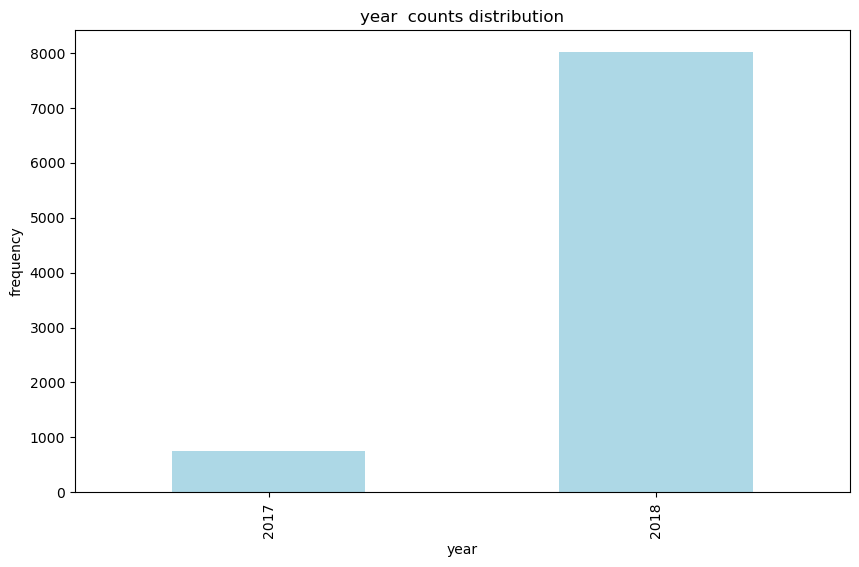

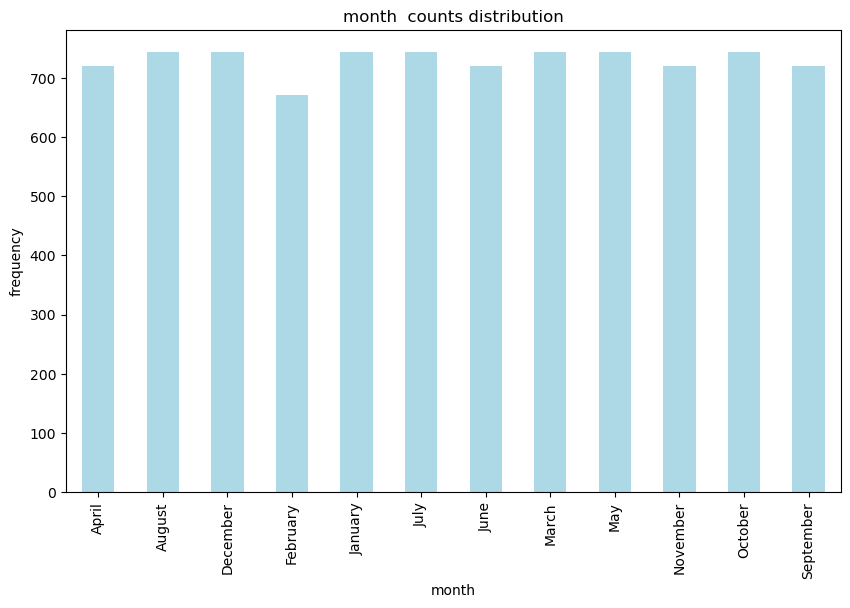

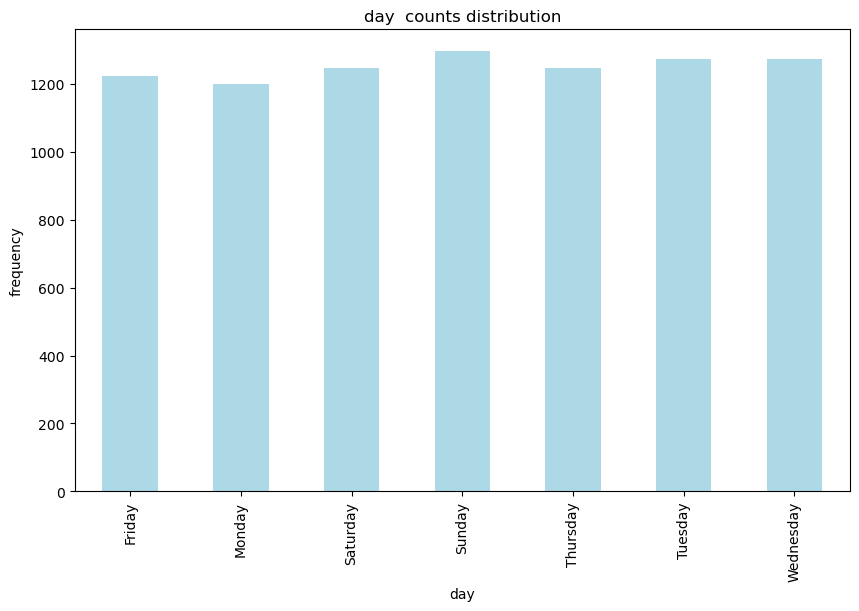

In [35]:
# Ploting count plot for categorical features

for col in categorical_features:
  counts = bike_df[col].value_counts().sort_index()
  fig = plt.figure(figsize=(10,6))
  ax = fig.gca()                                         
  counts.plot.bar(ax=ax,color='lightblue')
  ax.set_title(col+'  counts distribution')
  ax.set_xlabel(col)
  ax.set_ylabel('frequency')

plt.show()    


#### Year column reveals that 80% data is for year 2018.

#### functioning day column we can say 90% data present is for when functioning day is present.

#### Holiday column feature we can predict that most of the Data is present for Non holiday.

#### Data distribution frequency is evenly distributed in ( Autumn(Fall), Spring, Summer, Winter )

### How the categorical features are distributed with respect to dependent feature for different hours in a day.

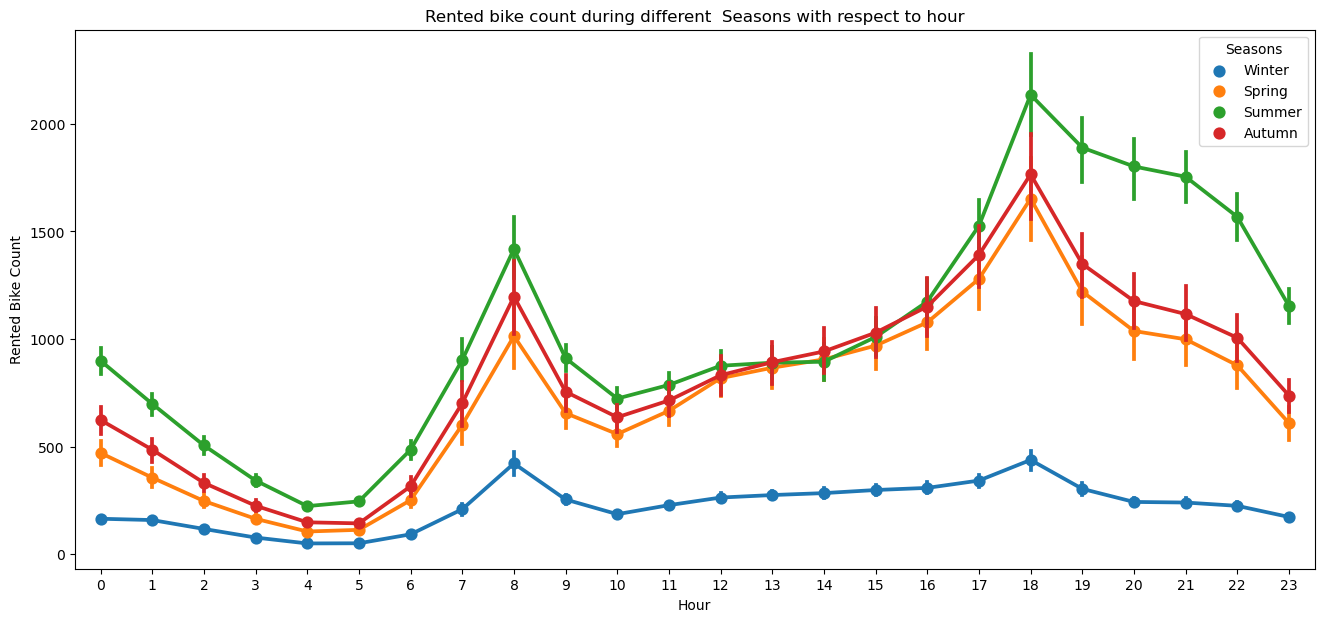

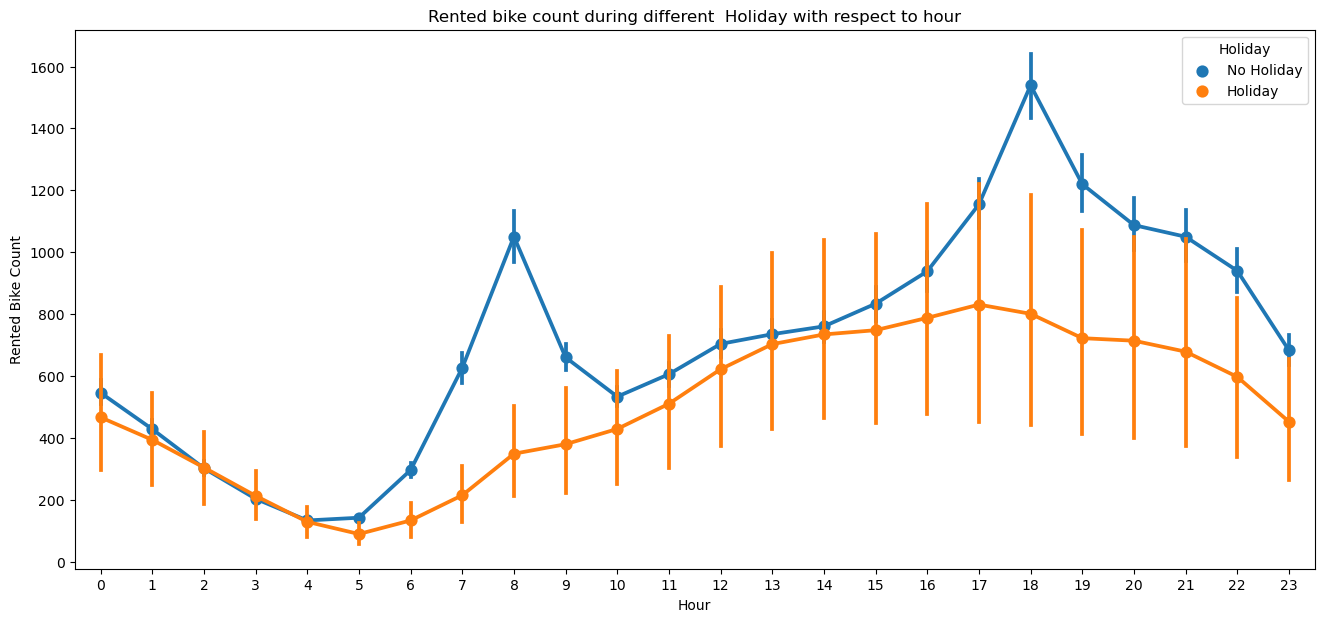

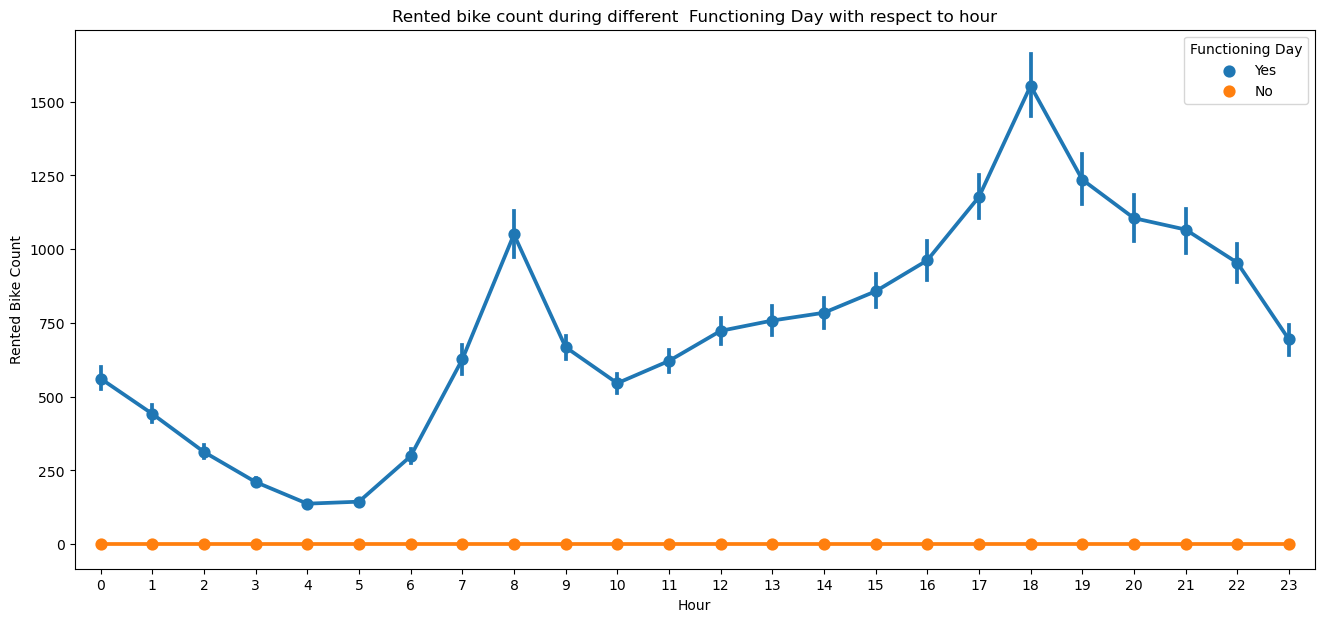

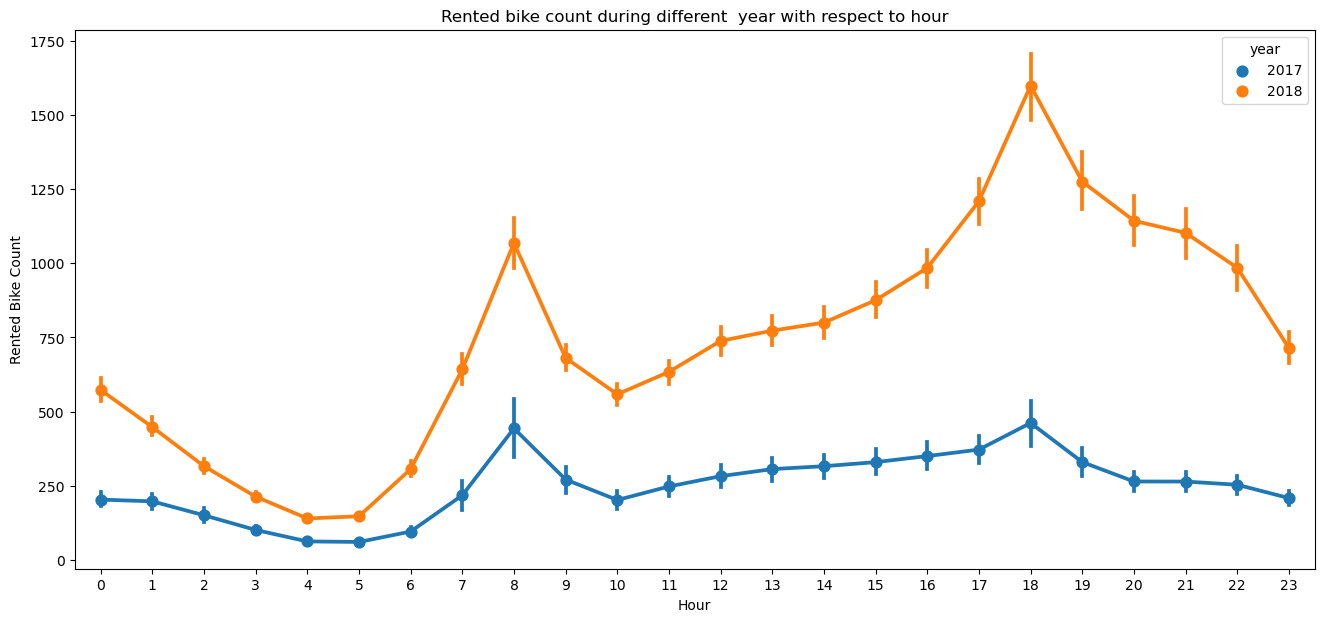

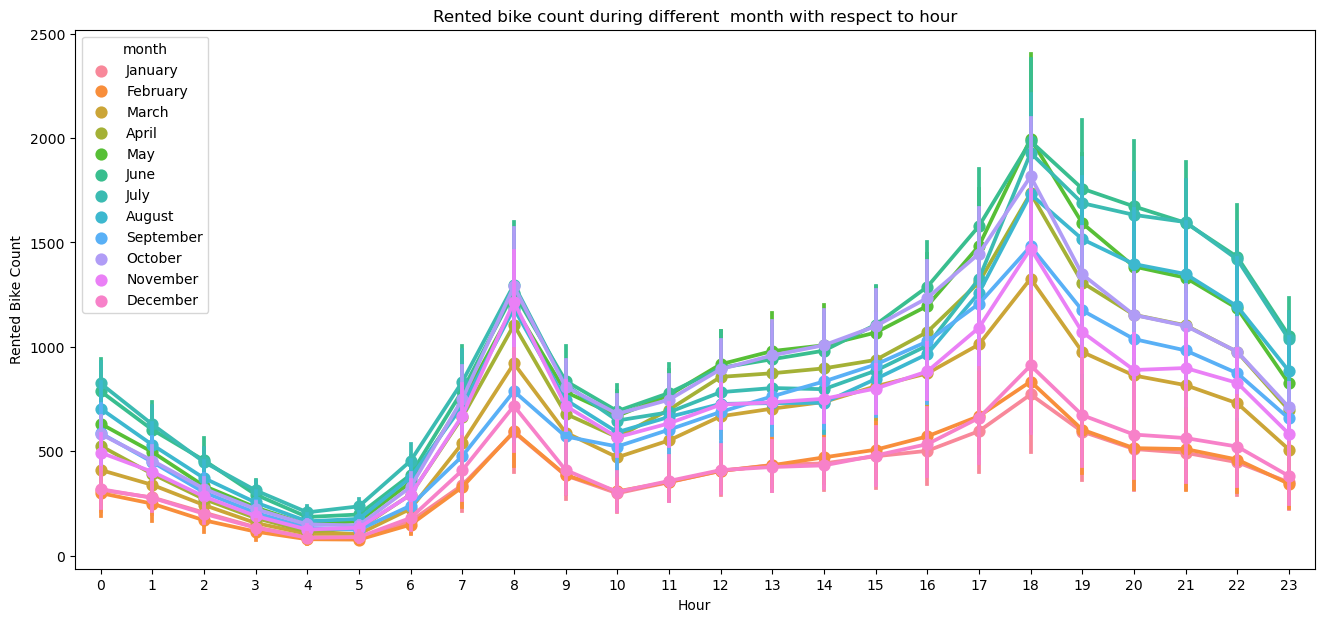

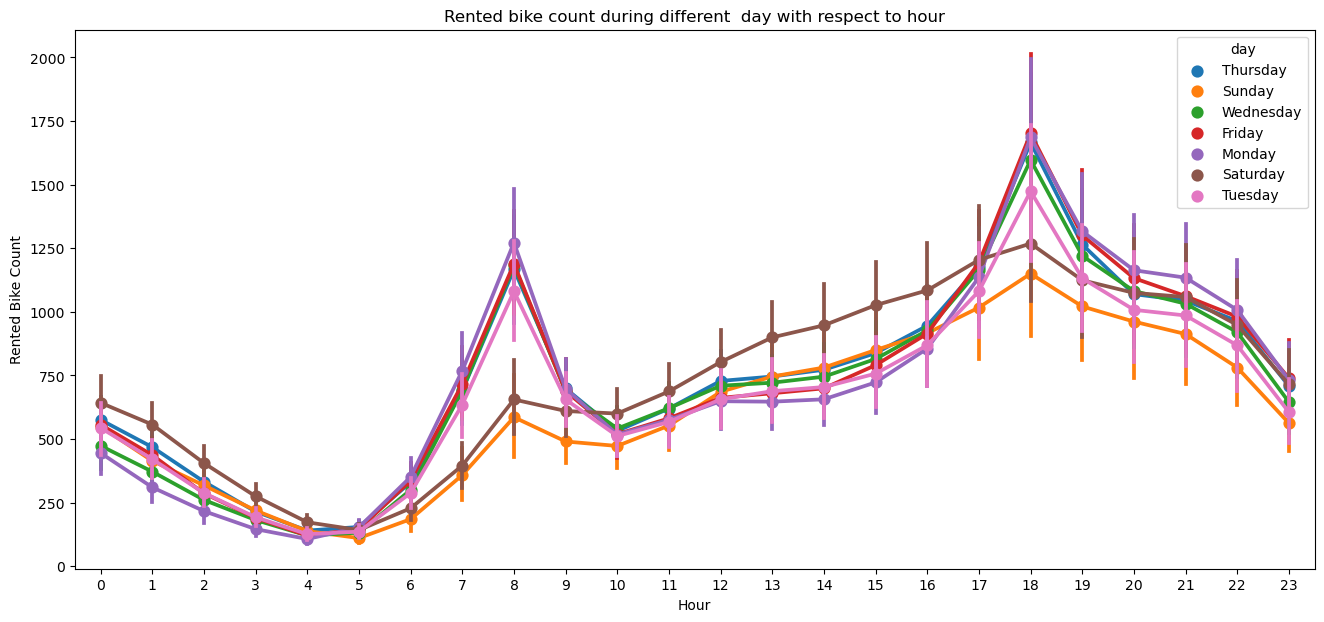

In [36]:
for col in categorical_features:
  if col == 'Hour':
    pass

  else :
    plt.figure(figsize=(16,7))
    sns.pointplot(x=bike_df['Hour'], y= bike_df['Rented Bike Count'], hue=bike_df[col])
    plt.title(f'Rented bike count during different  {col} with respect to hour')

plt.show()

Seasonal demand for bikes is lower during winter and higher during summer, as evident from the Season column.

Demand during holidays is lower compared to non-holidays, possibly due to people using bikes for commuting to work, as stated in the Holiday column.

No demand exists on days when there is no Functioning Day, as mentioned in the Functioning Day column.

Demand for rented bikes increased in 2018 as compared to 2017, which could be attributed to increased awareness about rented bike facilities in 2017.

The Days of week column indicates a different demand pattern on weekdays and weekends. Afternoon demand on weekends is higher, while office hours show higher demand during weekdays.

Demand is lower in December, January, and February as these months are cold and the Season column already established low demand during winters. This information is clearly visible in the Month column.

### Feature Engineering

In [38]:
def hour(h):
  
  if h >= 7 and h <=10:
    return 'Morning'

  elif h>=11 and h<=16:
    return 'Afternoon'

  elif h>=17 and h<=22:
    return 'Evening'

  else:
    return 'Night'
     

In [39]:
bike_df['Hour'] = bike_df['Hour'].apply(hour)

In [40]:
bike_df['Hour'].value_counts()

Night        2920
Afternoon    2190
Evening      2190
Morning      1460
Name: Hour, dtype: int64

#### Checking if some outliers present in categroical features as wrt dependent variable.



====================================================================== Hour ======================================================================




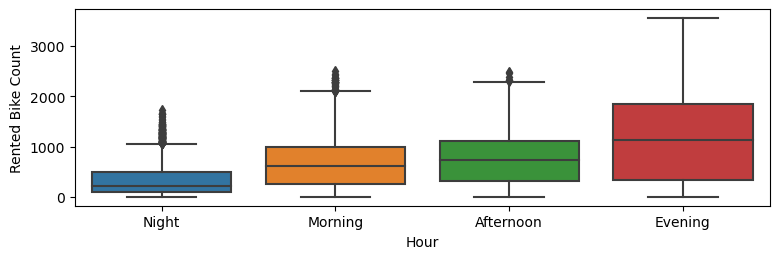



====================================================================== Seasons ======================================================================




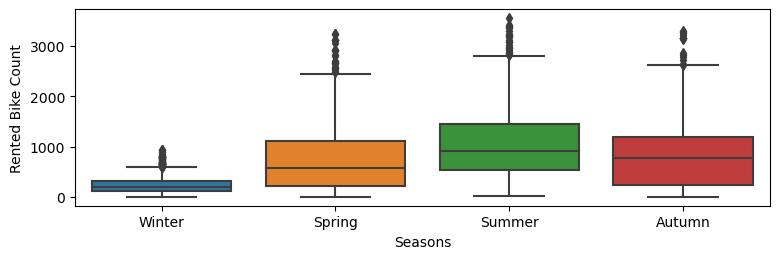



====================================================================== Holiday ======================================================================




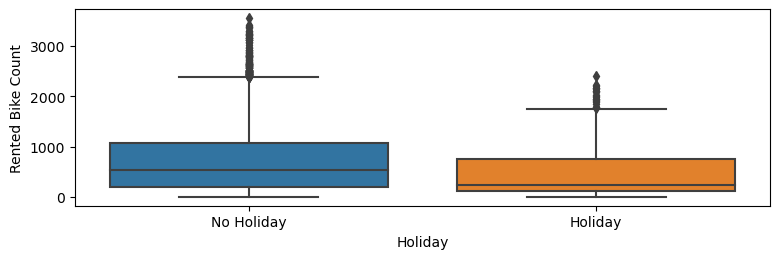



====================================================================== Functioning Day ======================================================================




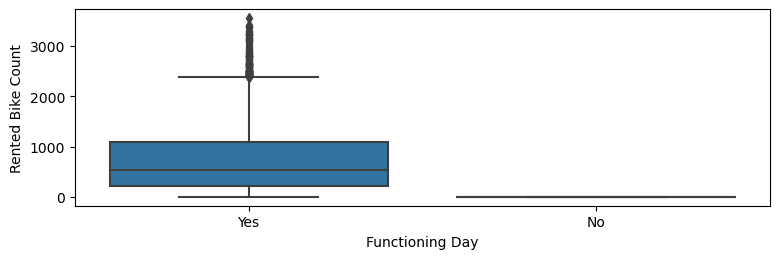



====================================================================== year ======================================================================




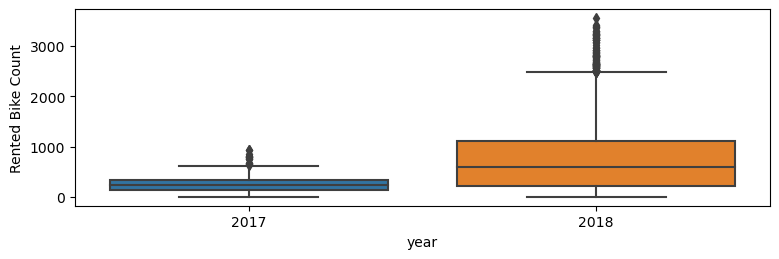



====================================================================== month ======================================================================




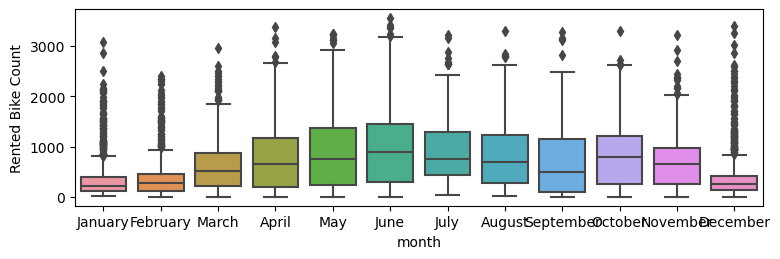



====================================================================== day ======================================================================




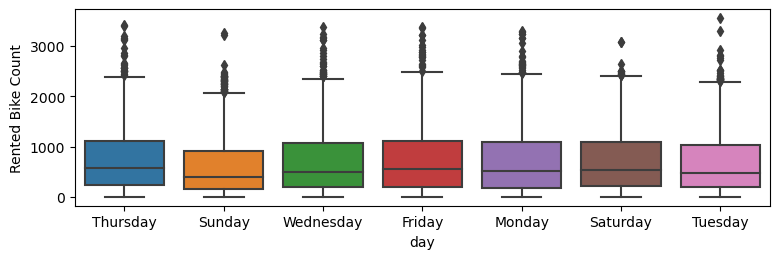

In [42]:
n=1
for i in categorical_features:
  plt.figure(figsize=(15,15))
  plt.subplot(6,2,n)
  n+=1
  print('\n')
  print('='*70,i,'='*70)
  print('\n')
  sns.boxplot(x=bike_df[i],y=bike_df["Rented Bike Count"])
  plt.tight_layout()
  plt.show()
     

It is recommended to update the day columns to differentiate between weekdays and weekends for better observation, based on the pattern of higher demand for rented bikes in the afternoon on weekends and during office hours on weekdays.

In [43]:
bike_df['week'] = bike_df['day'].apply(lambda x:'Weekend'  if x=='Saturday' or  x== 'Sunday' else 'Weekdays')

In [44]:

bike_df.head(2)

Rented Bike Count   Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254  Night             -5.2           37               2.2   
1                204  Night             -5.5           38               0.8   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  year  \
0           0.0            0.0  Winter  No Holiday             Yes  2017   
1           0.0            0.0  Winter  No Holiday             Yes  2017   

     month       day      week  
0  January  Thursday  Weekdays  
1  January  Thursday  Weekdays

Now no need of day column in datframe so we can remove it.

In [46]:
bike_df.drop(columns=['day'], inplace=True)  

In [47]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   object 
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  year                       8760 non-null   objec

In [48]:
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'year', 'month',
       'day'],
      dtype='object')

In [49]:
#dropping day column
categorical_features = categorical_features.drop('day') 

In [50]:
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'year', 'month'], dtype='object')

### Checking how much percentage of features present in dataset

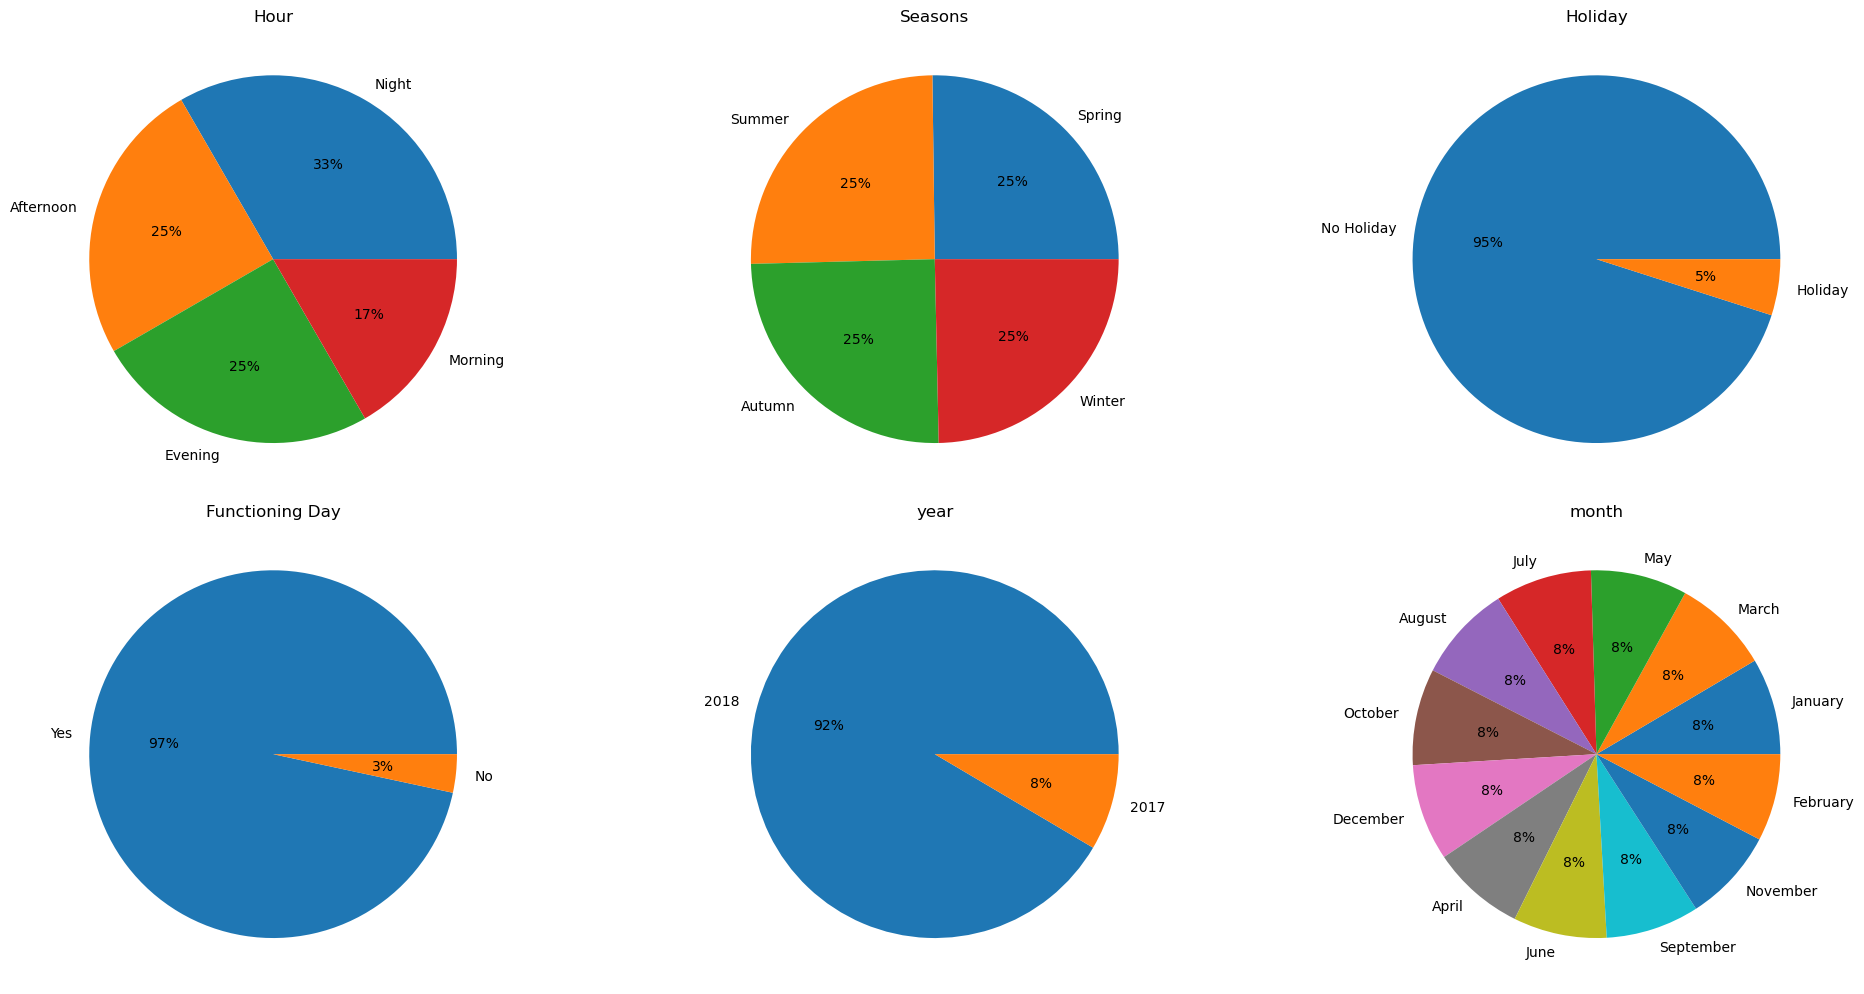

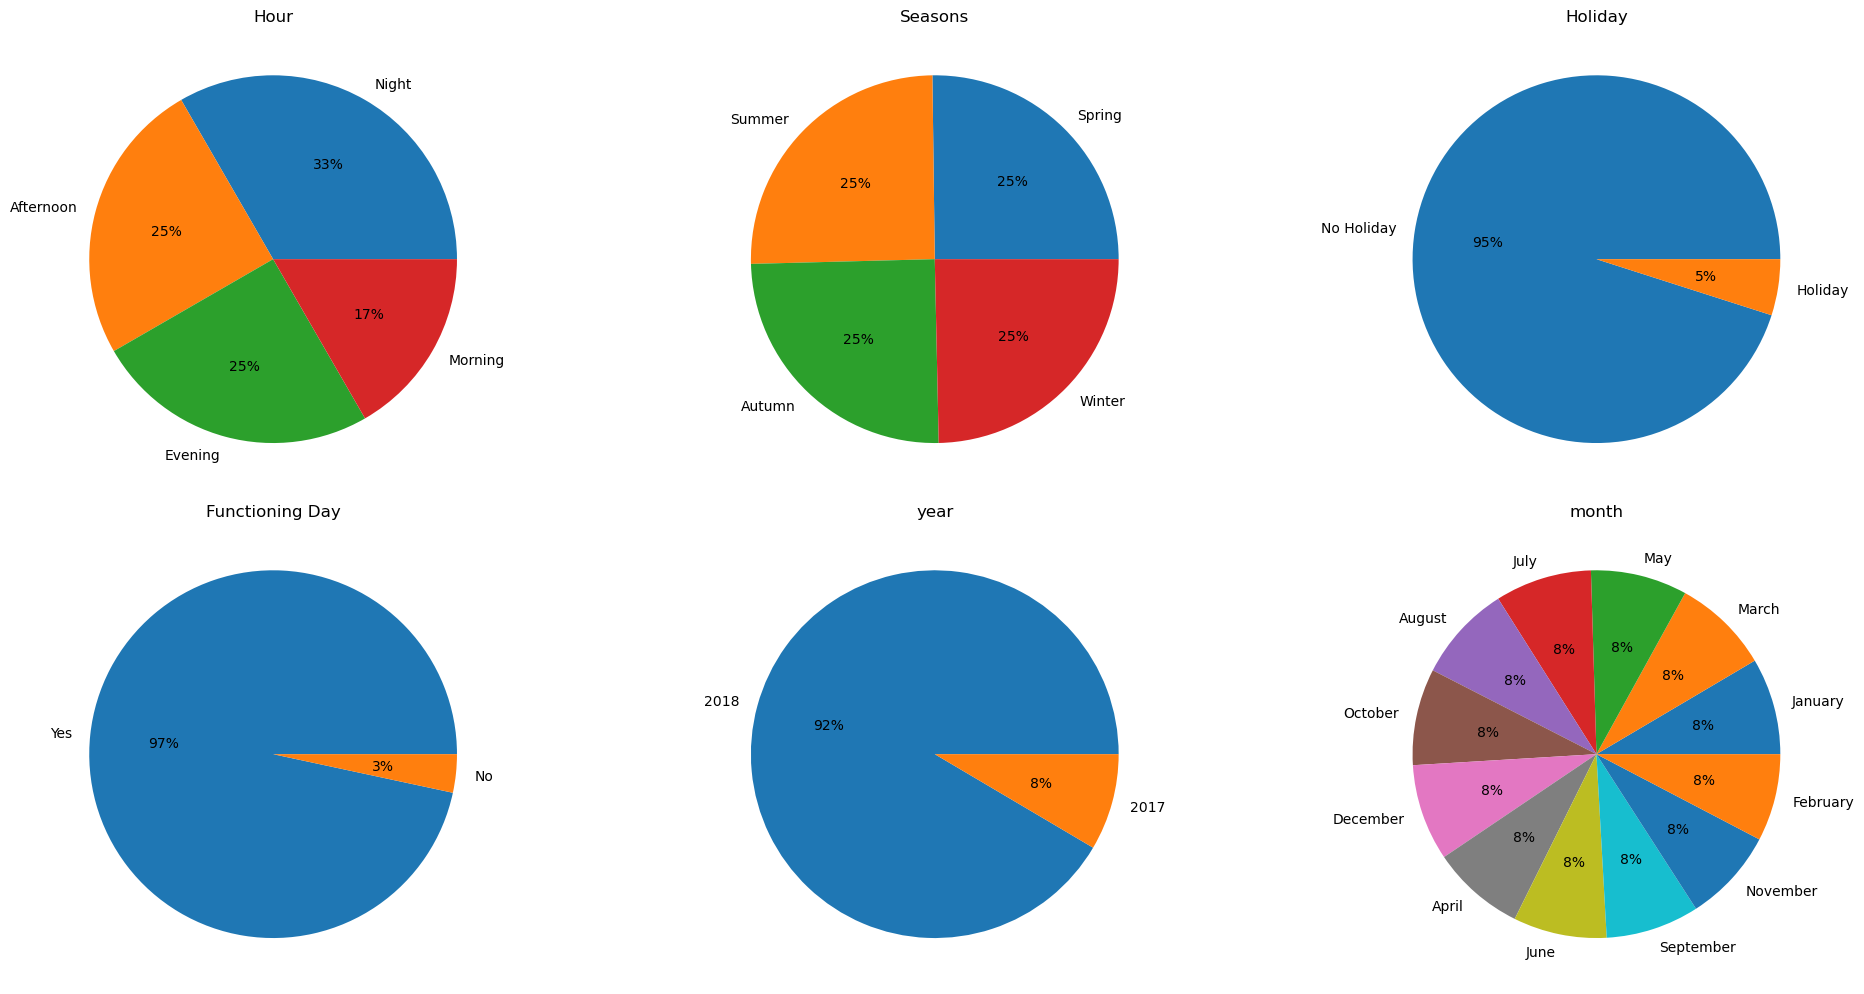

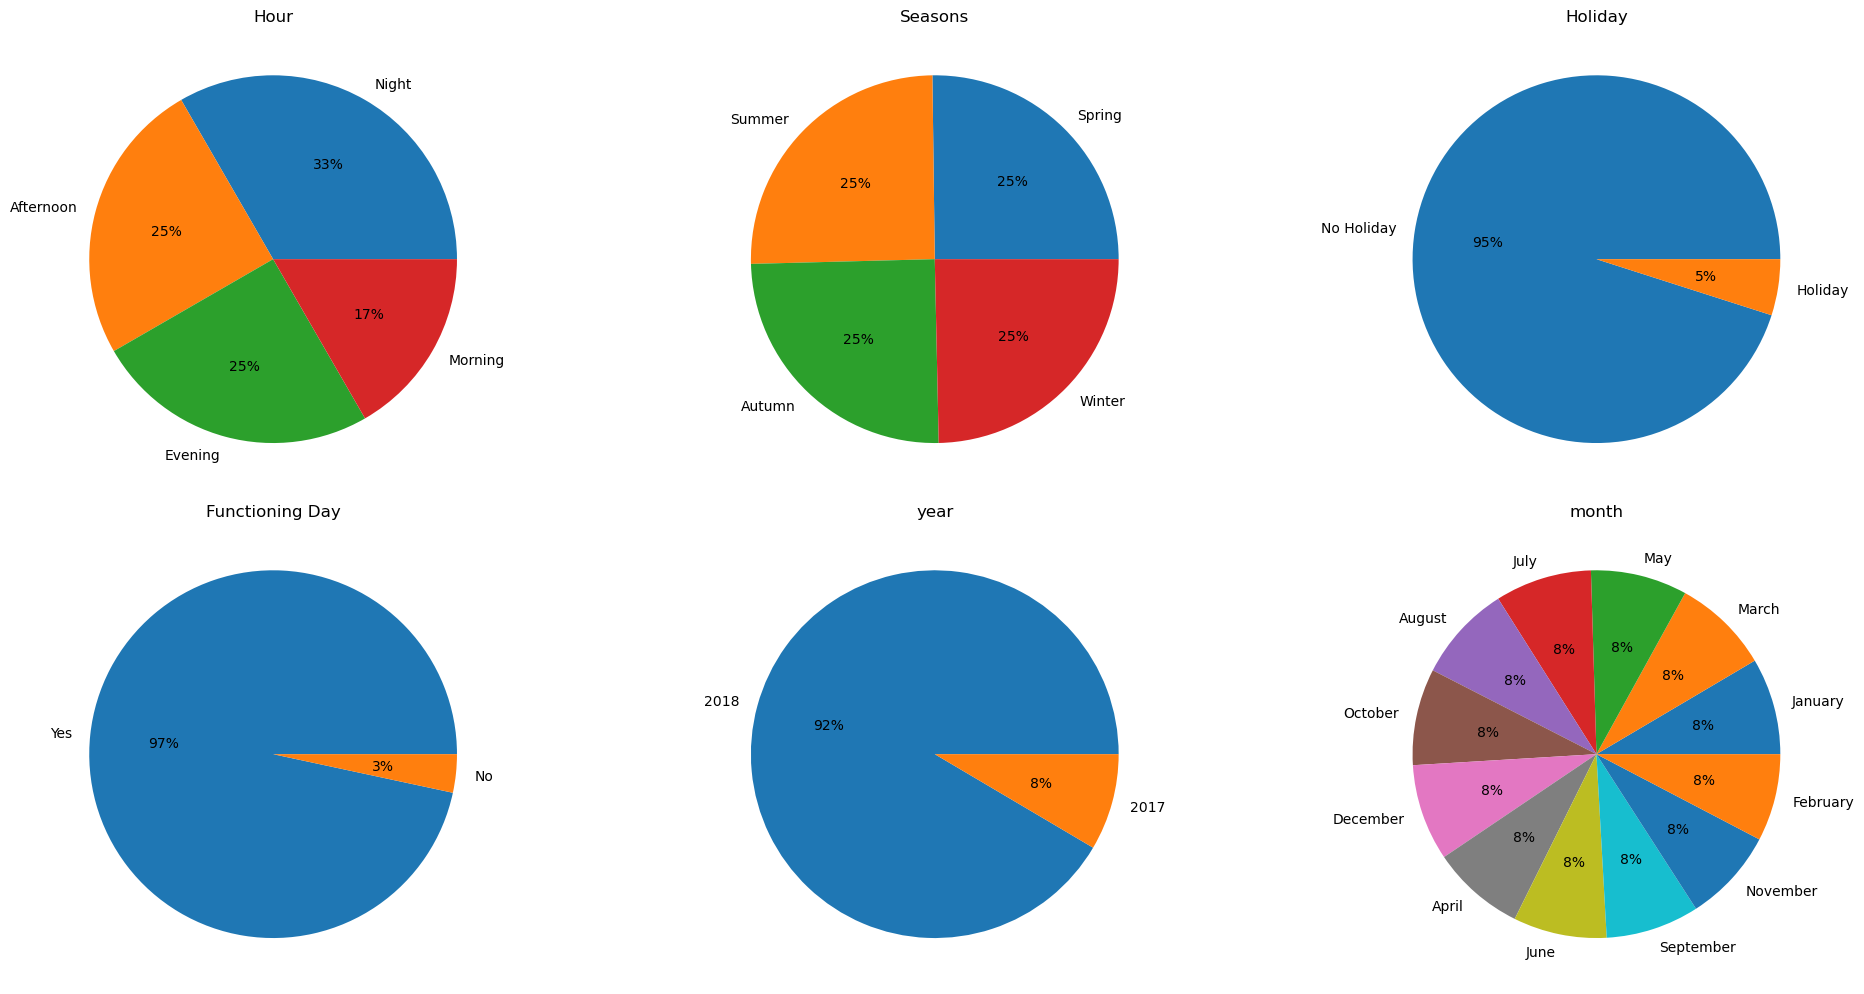

In [54]:
n=1
plt.figure(figsize=(20,15))
for i in categorical_features:
  plt.subplot(3,3,n)
  n=n+1
  plt.pie(bike_df[i].value_counts(),labels = bike_df[i].value_counts().keys().tolist(),autopct='%.0f%%')
  plt.title(i)
  plt.tight_layout()
plt.show()

The "Holiday" feature contains 95% data for non-holidays, which is crucial for predicting bike rental counts.

The year 2018 accounts for 92% of the data in the year feature, indicating a significant increase in the use of rented bikes in that year.

### Analysing Numerical Features

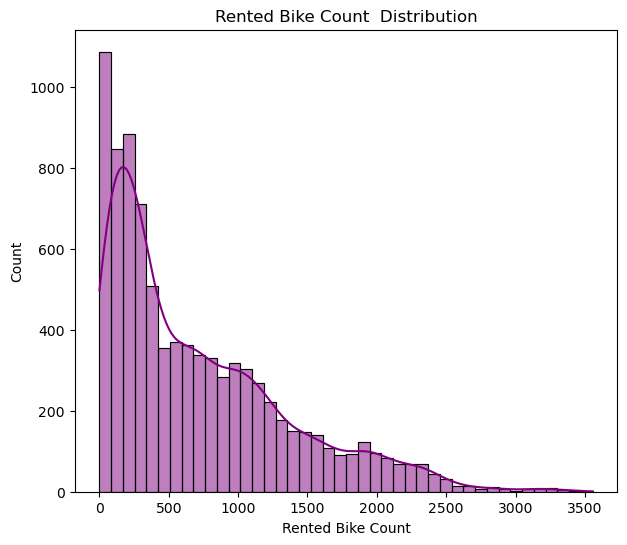

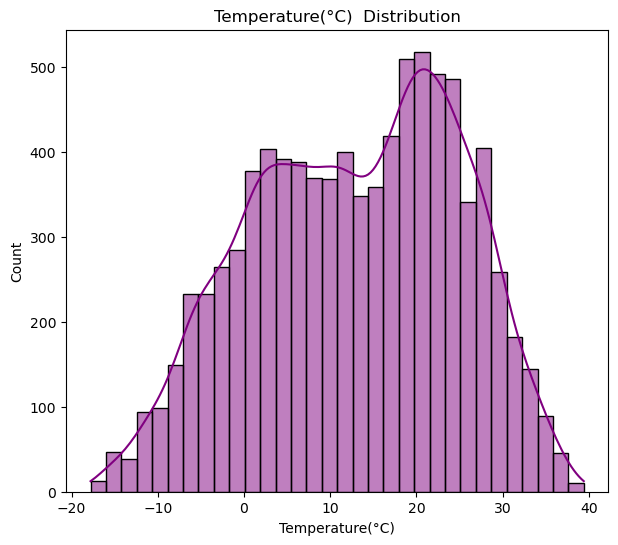

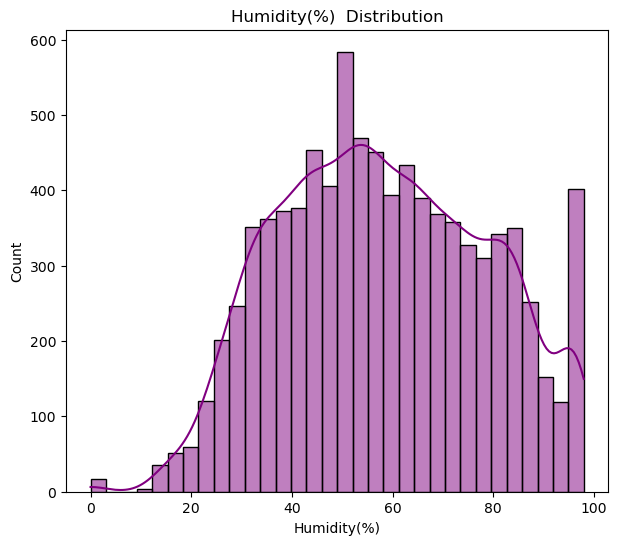

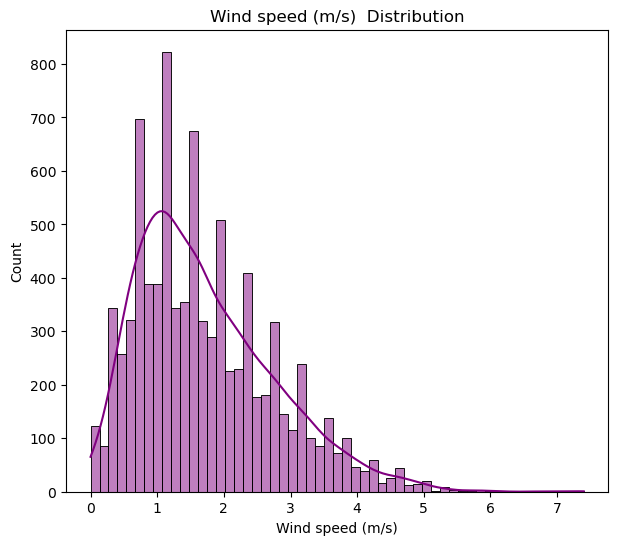

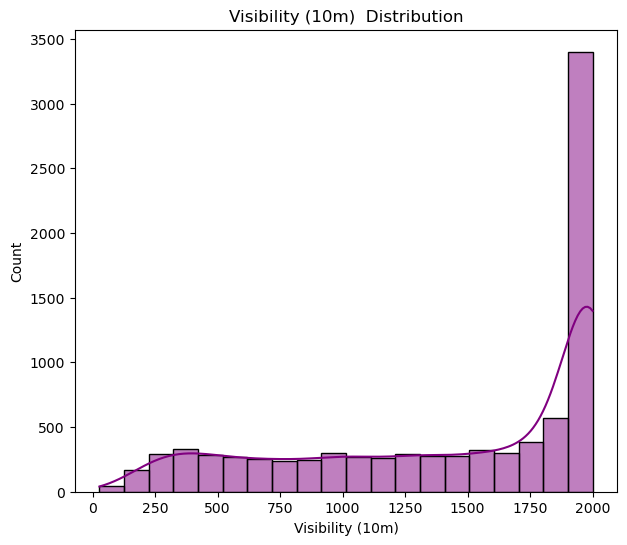

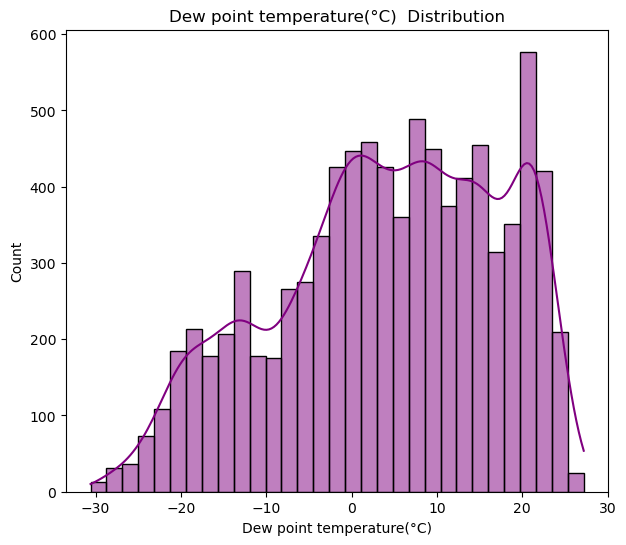

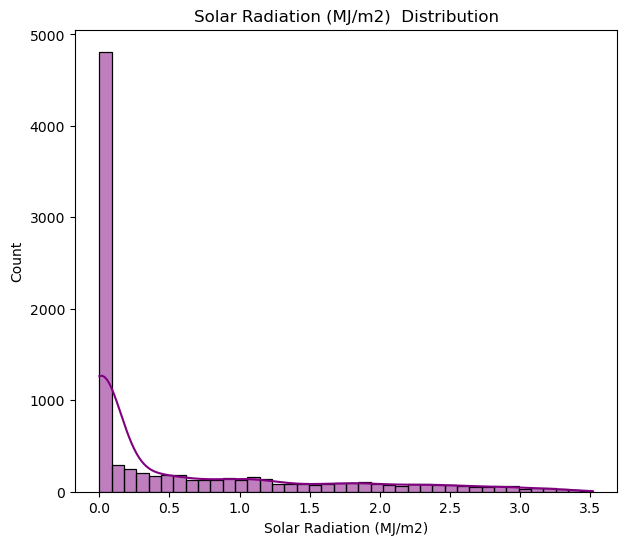

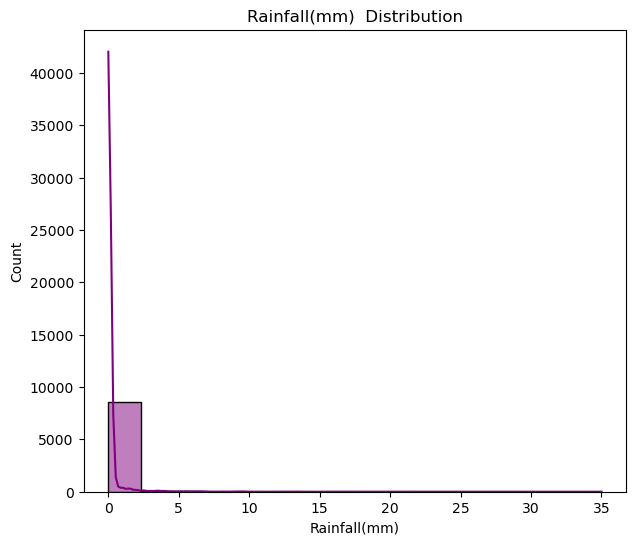

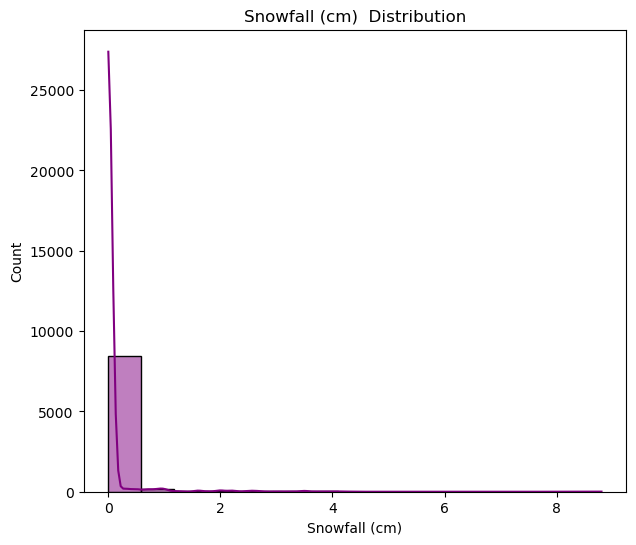

In [55]:
for col in numeric_features:
    fig = plt.figure(figsize=(7, 6))
    ax = fig.gca()
    feature = bike_df[col]
    sns.histplot(data=bike_df,x=col ,ax = ax,color='purple', kde=True)
    plt.title(col + '  Distribution')

plt.show()
     

###  check features distribution with their mean and median so we can get better analysis of features values.

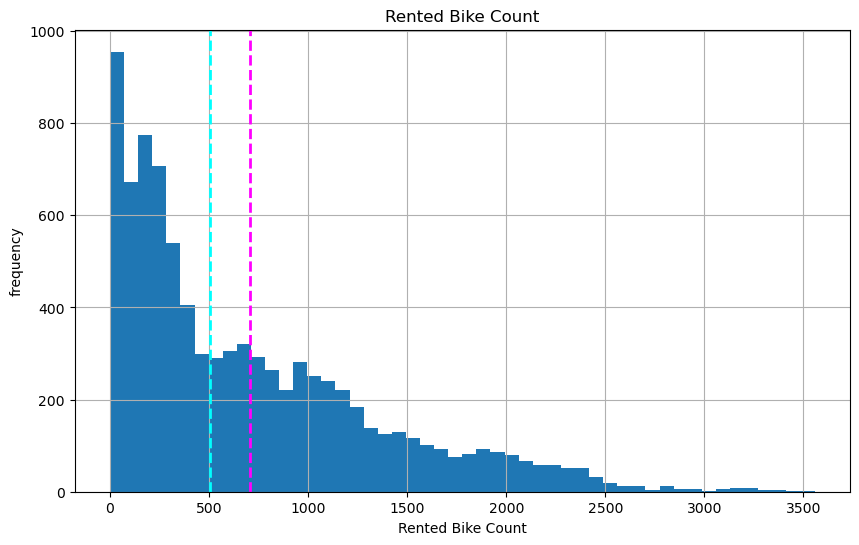

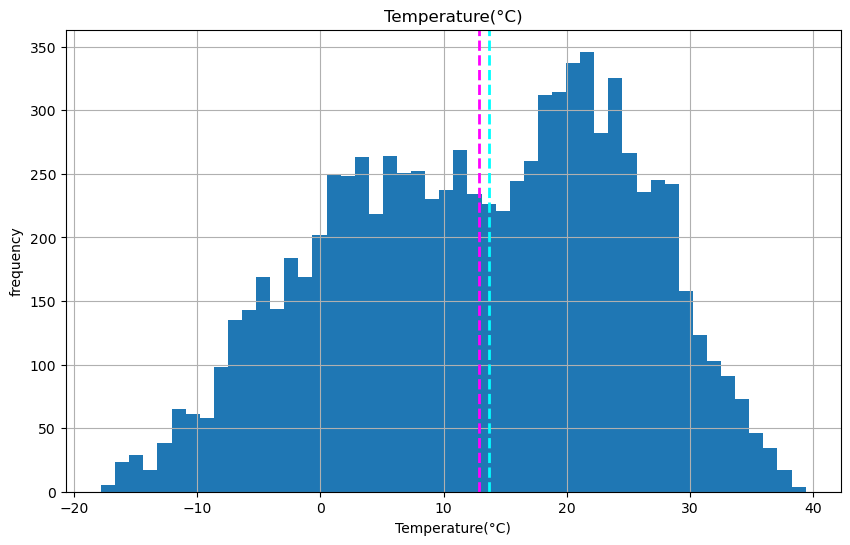

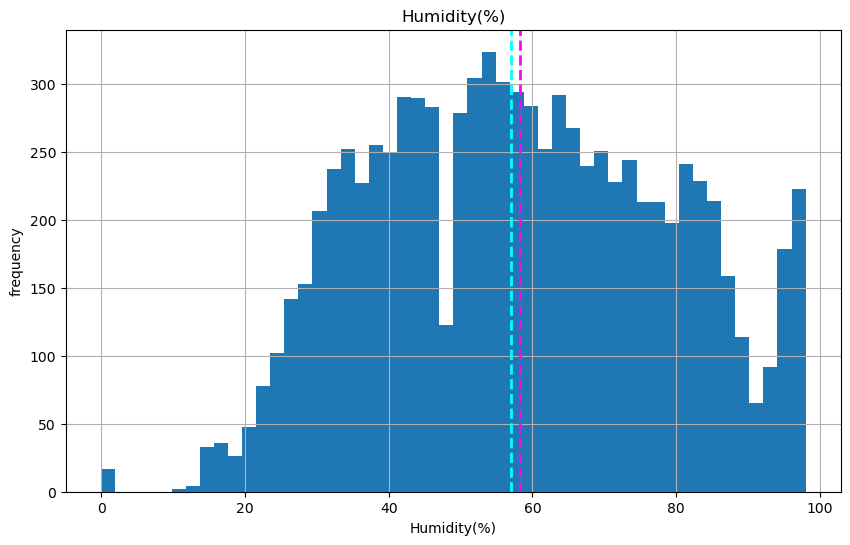

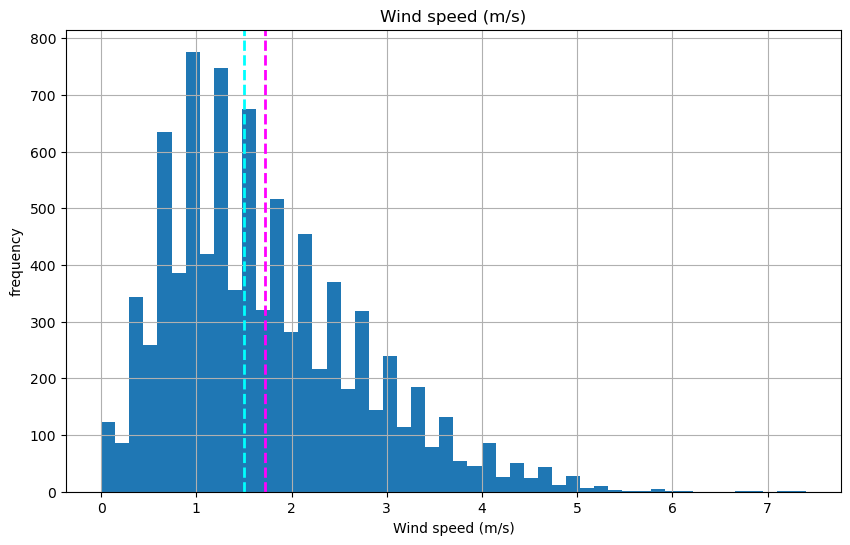

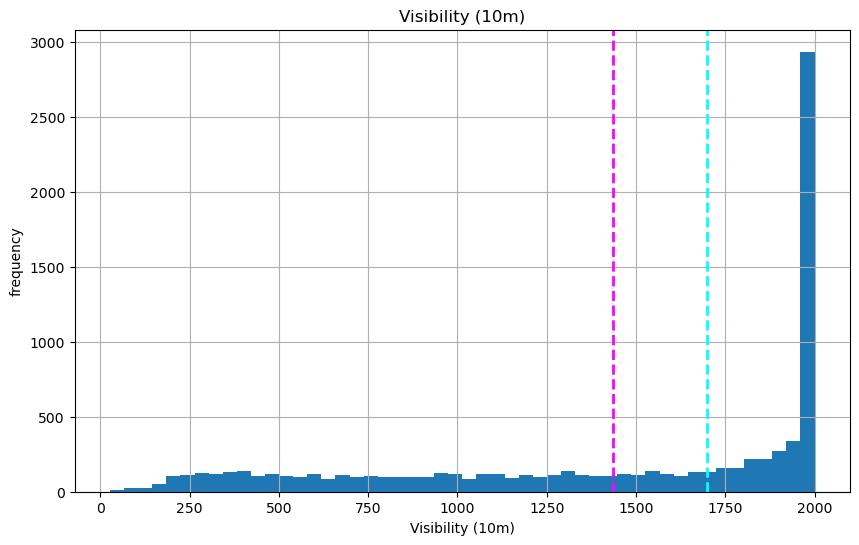

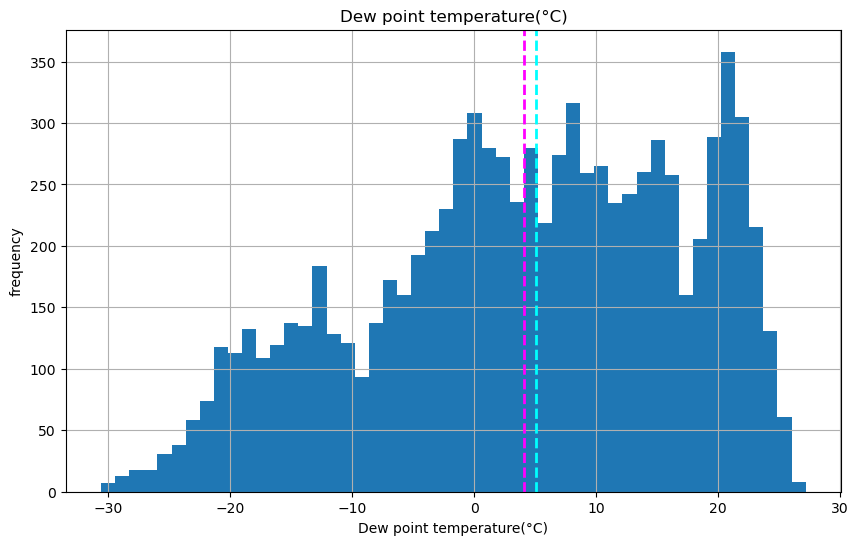

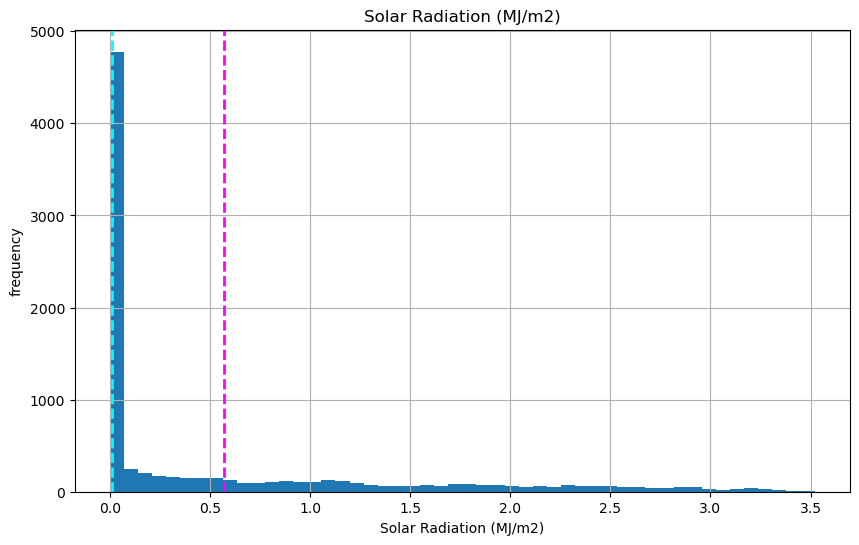

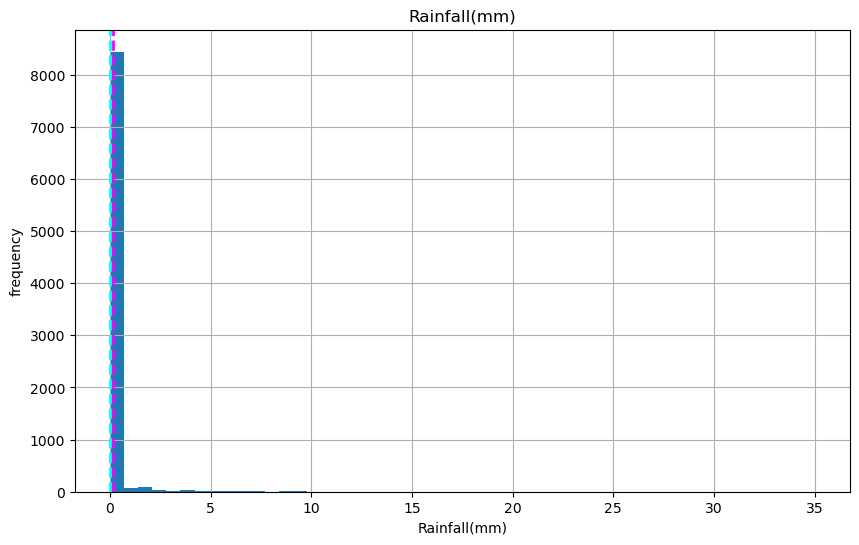

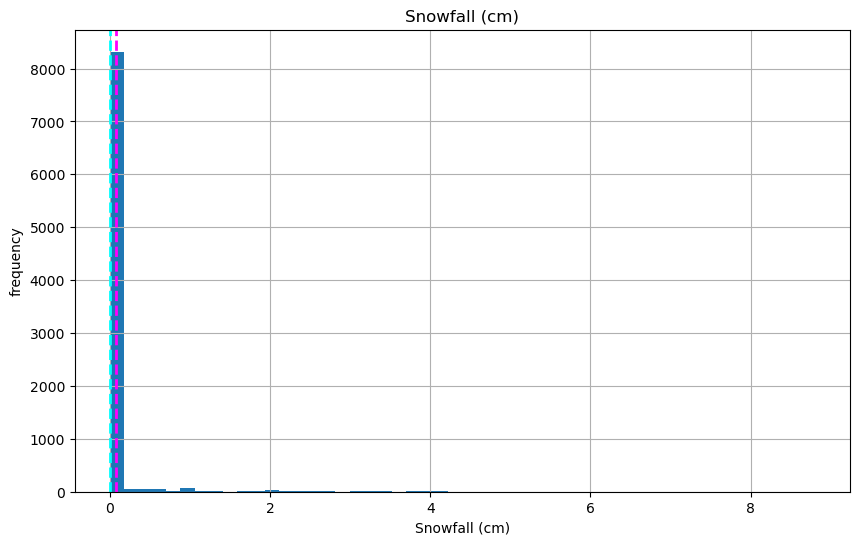

In [56]:
for col in numeric_features[:]:
  fig = plt.figure(figsize=(10,6))
  
  ax = fig.gca()                     # gca() ---> get current axis
  feature = bike_df[col]      # to transform features into normal distribution we used log10 transformation
  feature.hist(bins=50, ax=ax)          # ploting histogram
  ax.axvline(feature.mean(),color='magenta',linestyle='dashed',linewidth=2)
  ax.axvline(feature.median(),color='cyan',linestyle='dashed',linewidth=2) 

  ax.set_title(col)
  ax.set_ylabel('frequency')
  ax.set_xlabel(col)

plt.show() 

### Now to find how is the relation of numerical features with our dependent variable. we use scatter plot.

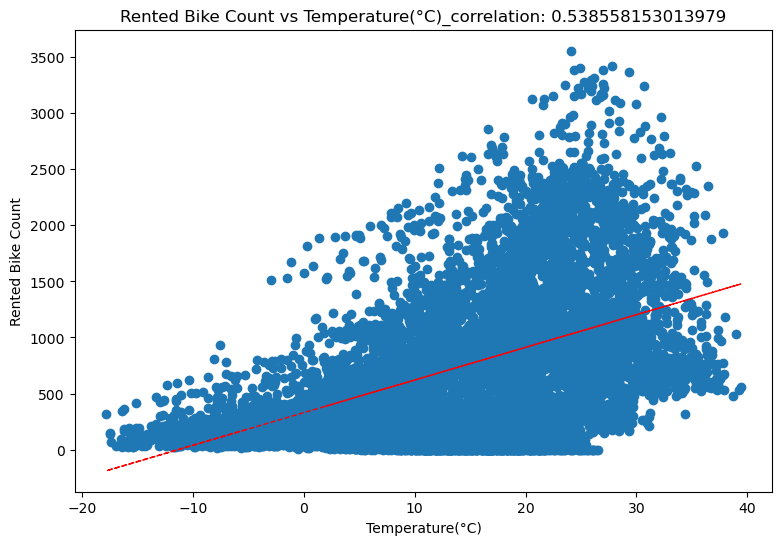

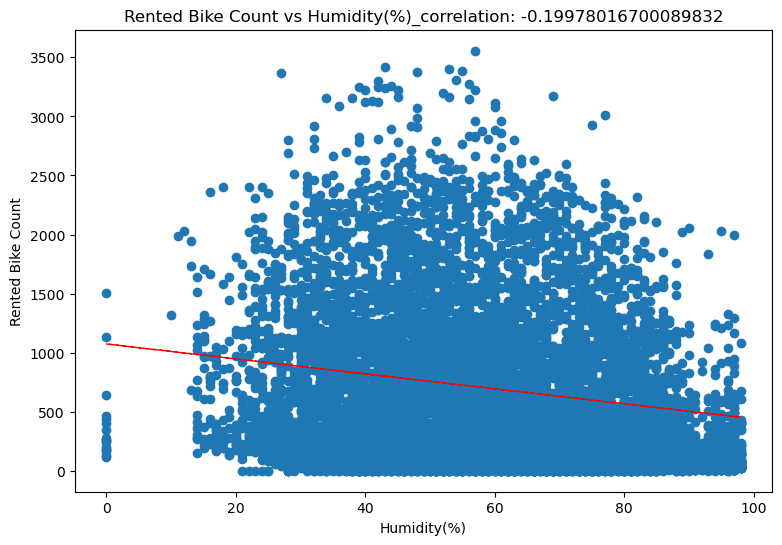

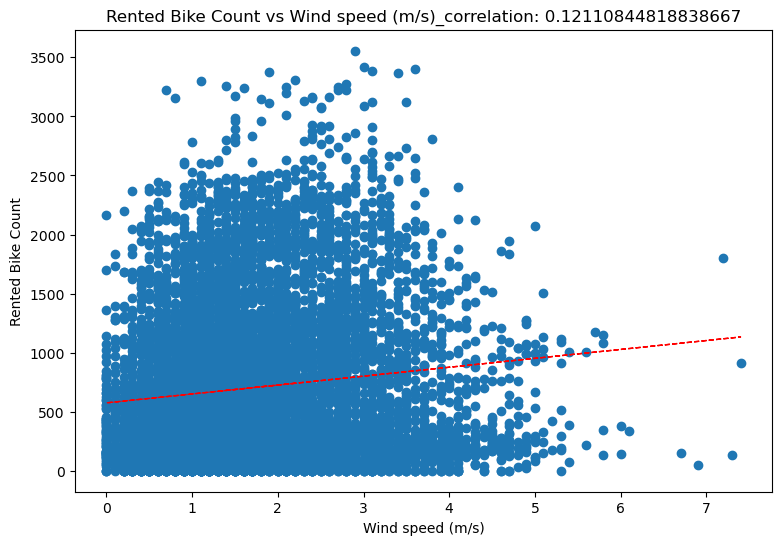

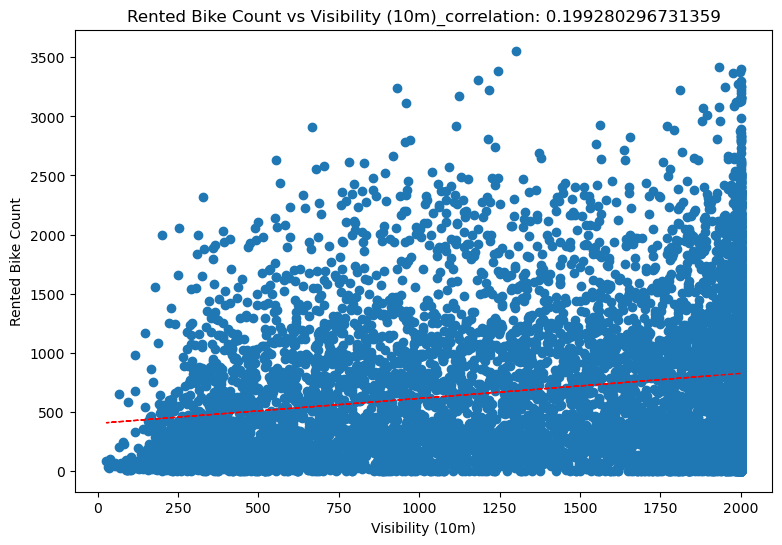

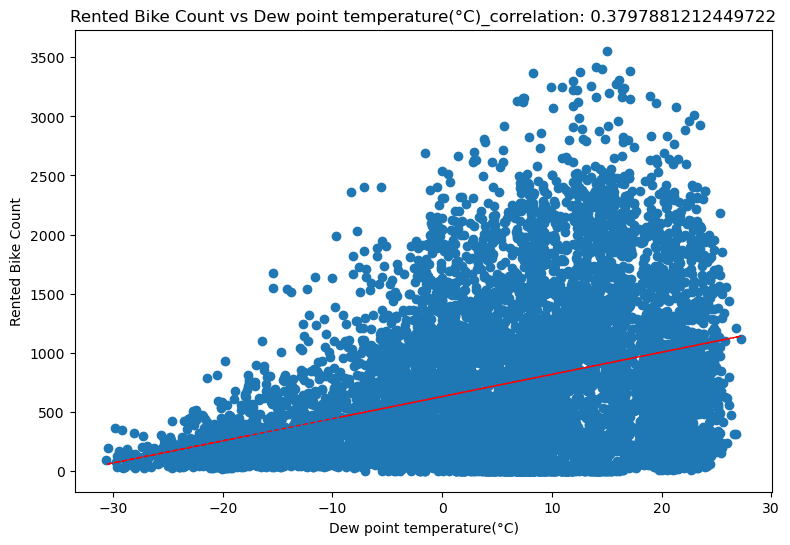

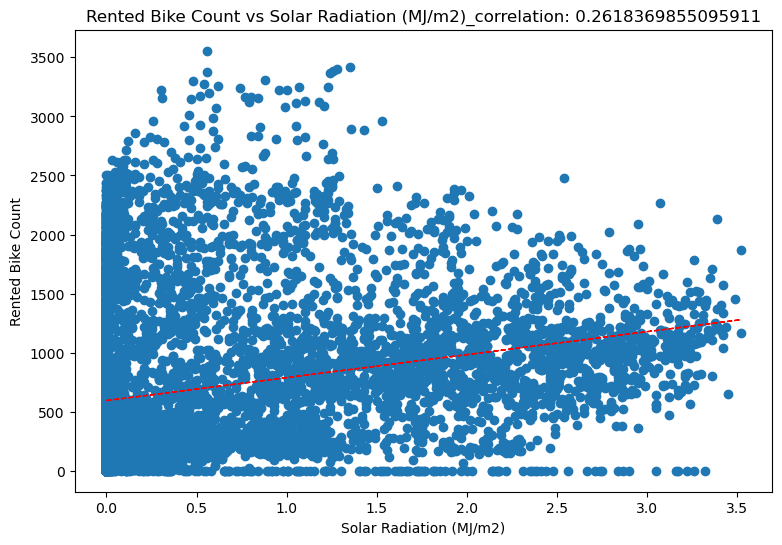

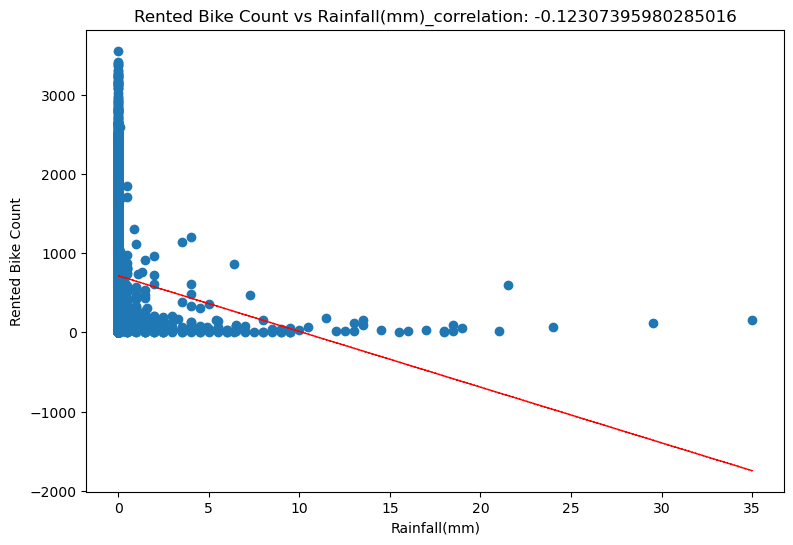

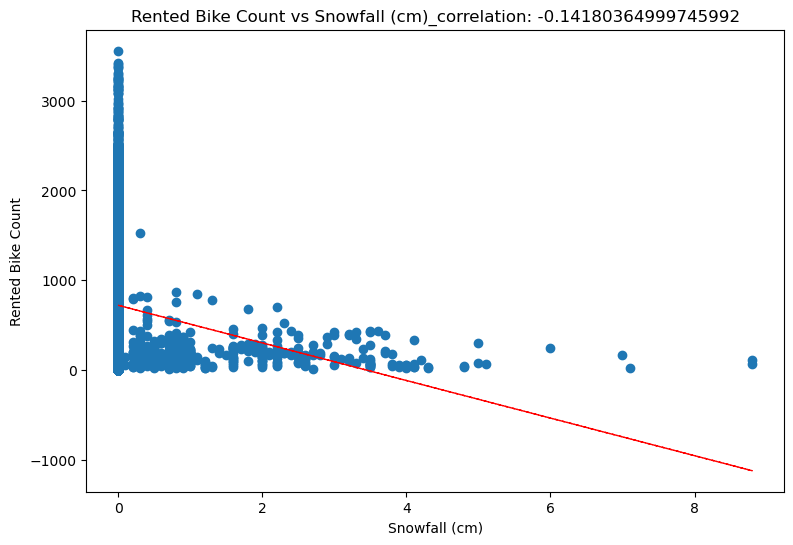

In [57]:
for col in numeric_features[1:]:    # since rented bike count column is not included in this for loop 
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature = bike_df[col]
  correlation = feature.corr(bike_df['Rented Bike Count'])
  plt.scatter(x=feature, y= bike_df['Rented Bike Count'])
  plt.xlabel(col)
  plt.ylabel('Rented Bike Count')
  ax.set_title('Rented Bike Count vs '+col+ '_correlation: '+str(correlation))
  z= np.polyfit(bike_df[col],bike_df['Rented Bike Count'],1)
  y_hat = np.poly1d(z)(bike_df[col])
  plt.plot(bike_df[col],y_hat,'r--',lw=1)

plt.show()

The scatter plot or regression plot indicates that certain numeric features have a positive correlation with the dependent variable, while others have a negative correlation.

The correlation of the features with the dependent feature is as follows:

Positive correlation: Temperature, wind speed, visibility, dew point temperature, and solar radiation.

Negative correlation: Humidity, rainfall, and snowfall.

 treating Outliers of features by using Boxplot to get better observation

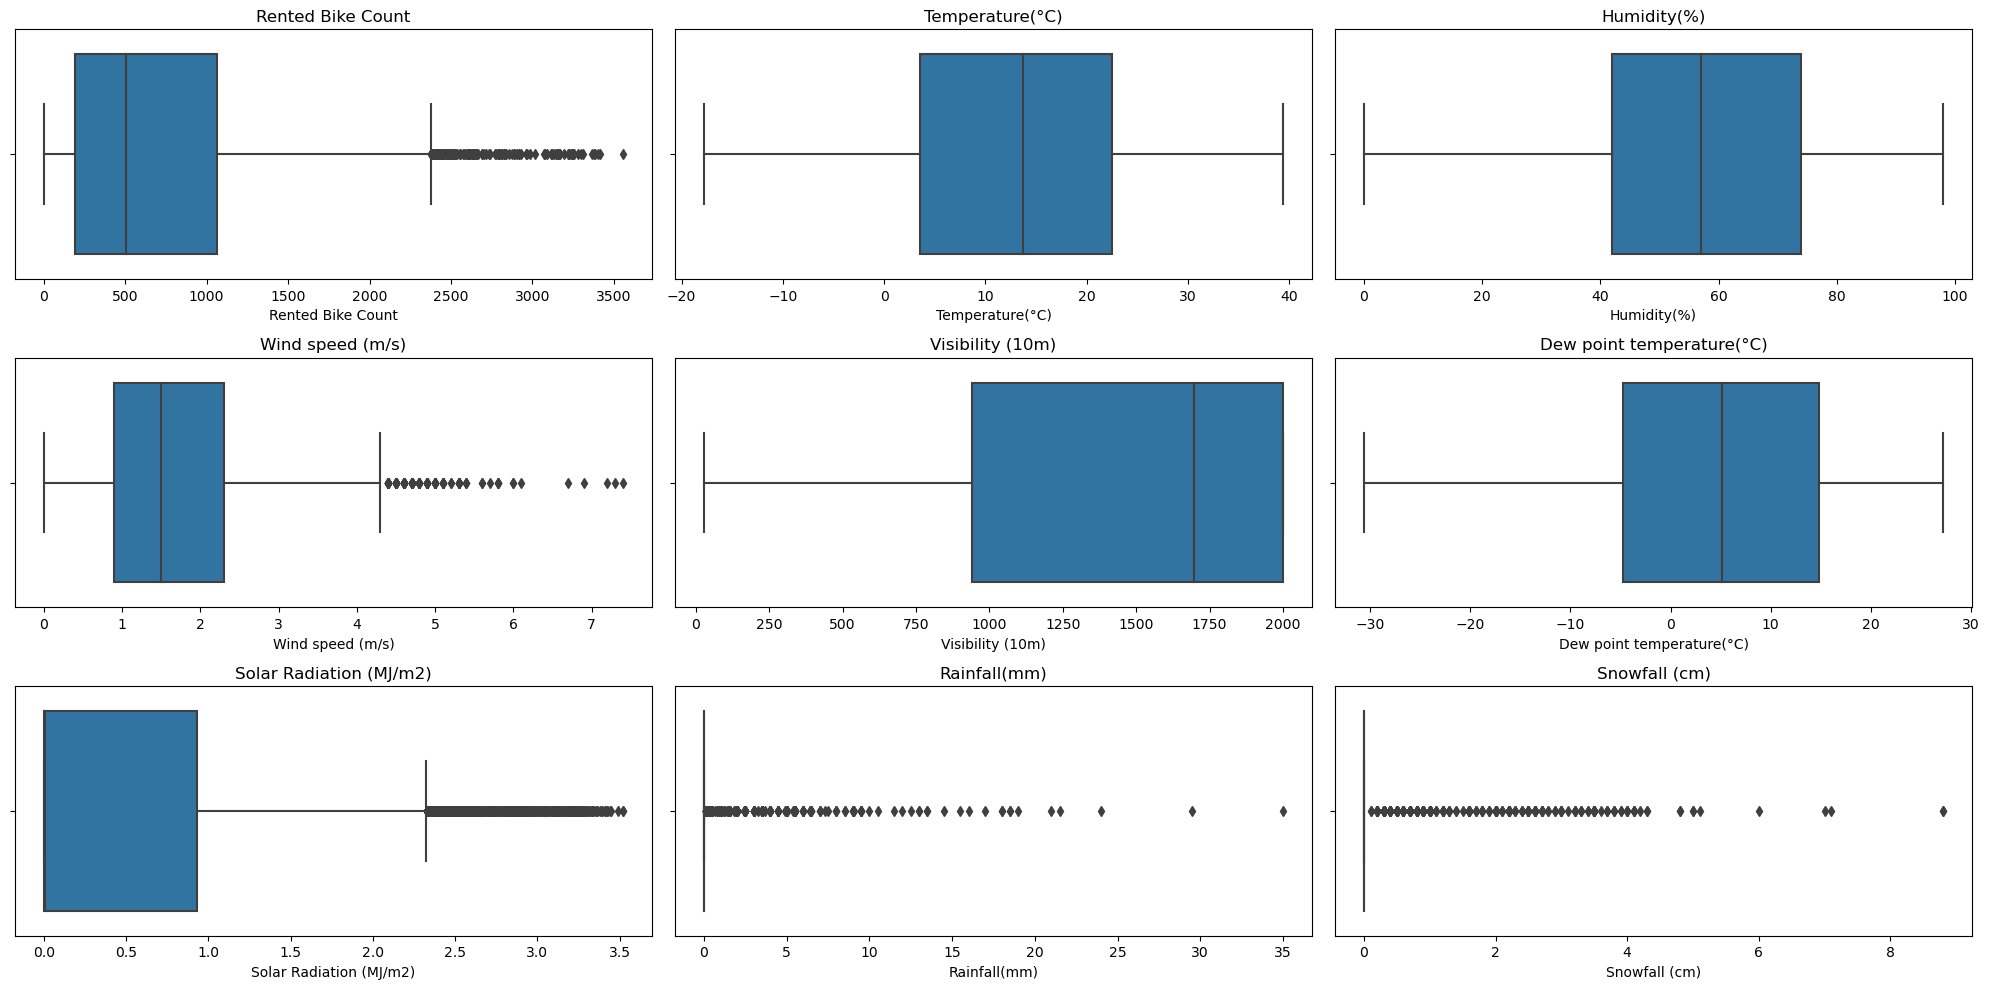

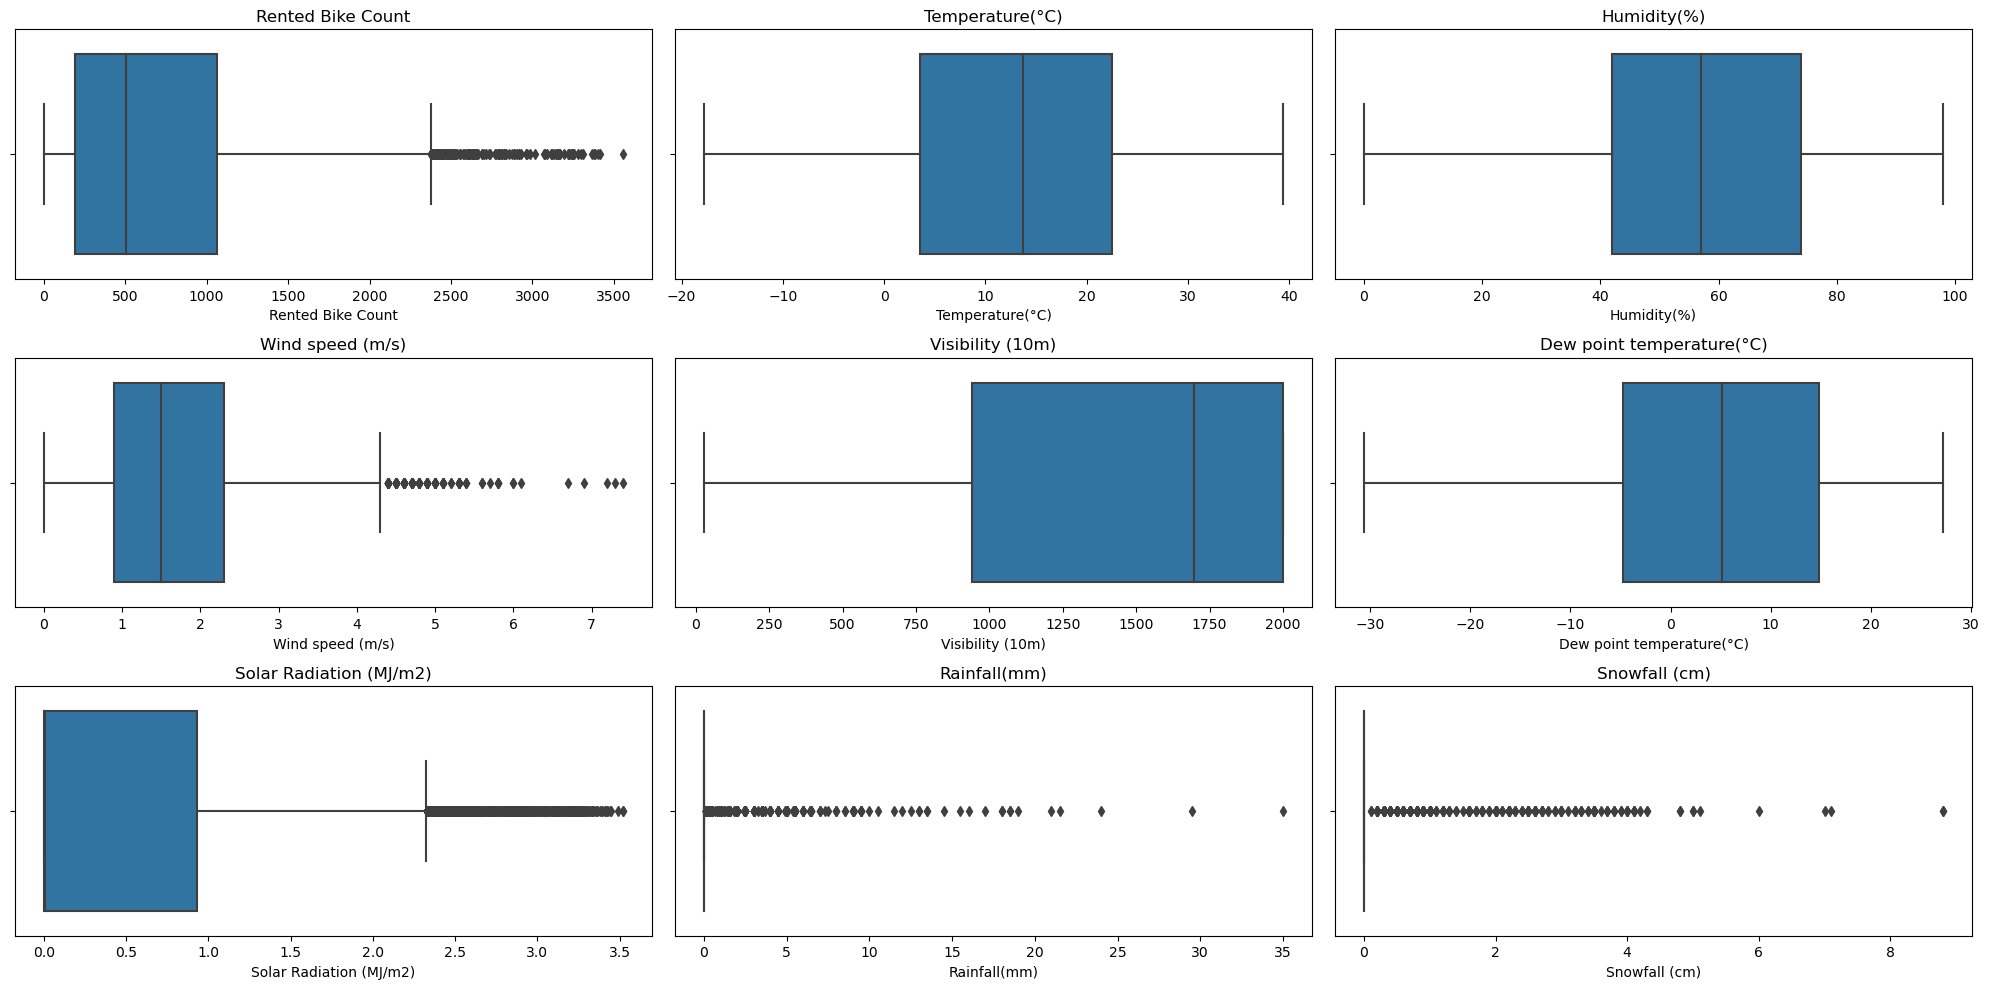

In [59]:
n = 1
plt.figure(figsize=(20,10))

for i in numeric_features[:]:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(bike_df[i])
  plt.title(i)
  plt.tight_layout()
plt.show()

In [60]:
bike_df.corr()

Rented Bike Count  Temperature(°C)  Humidity(%)  \
Rented Bike Count                   1.000000         0.538558    -0.199780   
Temperature(°C)                     0.538558         1.000000     0.159371   
Humidity(%)                        -0.199780         0.159371     1.000000   
Wind speed (m/s)                    0.121108        -0.036252    -0.336683   
Visibility (10m)                    0.199280         0.034794    -0.543090   
Dew point temperature(°C)           0.379788         0.912798     0.536894   
Solar Radiation (MJ/m2)             0.261837         0.353505    -0.461919   
Rainfall(mm)                       -0.123074         0.050282     0.236397   
Snowfall (cm)                      -0.141804        -0.218405     0.108183   

                           Wind speed (m/s)  Visibility (10m)  \
Rented Bike Count                  0.121108          0.199280   
Temperature(°C)                   -0.036252          0.034794   
Humidity(%)                       -0.336683         -0.543090   
Wind speed (m/s)                   1.000000          0.171507   
Visibility (10m)                   0.171507          1.000000   
Dew point temperature(°C)         -0.176486         -0.176630   
Solar Radiation (MJ/m2)            0.332274          0.149738   
Rainfall(mm)                      -0.019674         -0.167629   
Snowfall (cm)                     -0.003554         -0.121695   

                           Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
Rented Bike Count                           0.379788                 0.261837   
Temperature(°C)                             0.912798                 0.353505   
Humidity(%)                                 0.536894                -0.461919   
Wind speed (m/s)                           -0.176486                 0.332274   
Visibility (10m)                           -0.176630                 0.149738   
Dew point temperature(°C)                   1.000000                 0.094381   
Solar Radiation (MJ/m2)                     0.094381                 1.000000   
Rainfall(mm)                                0.125597                -0.074290   
Snowfall (cm)                              -0.150887                -0.072301   

                           Rainfall(mm)  Snowfall (cm)  
Rented Bike Count             -0.123074      -0.141804  
Temperature(°C)                0.050282      -0.218405  
Humidity(%)                    0.236397       0.108183  
Wind speed (m/s)              -0.019674      -0.003554  
Visibility (10m)              -0.167629      -0.121695  
Dew point temperature(°C)      0.125597      -0.150887  
Solar Radiation (MJ/m2)       -0.074290      -0.072301  
Rainfall(mm)                   1.000000       0.008500  
Snowfall (cm)                  0.008500       1.000000

### Plot Heatmap to get better visualization about features correlation

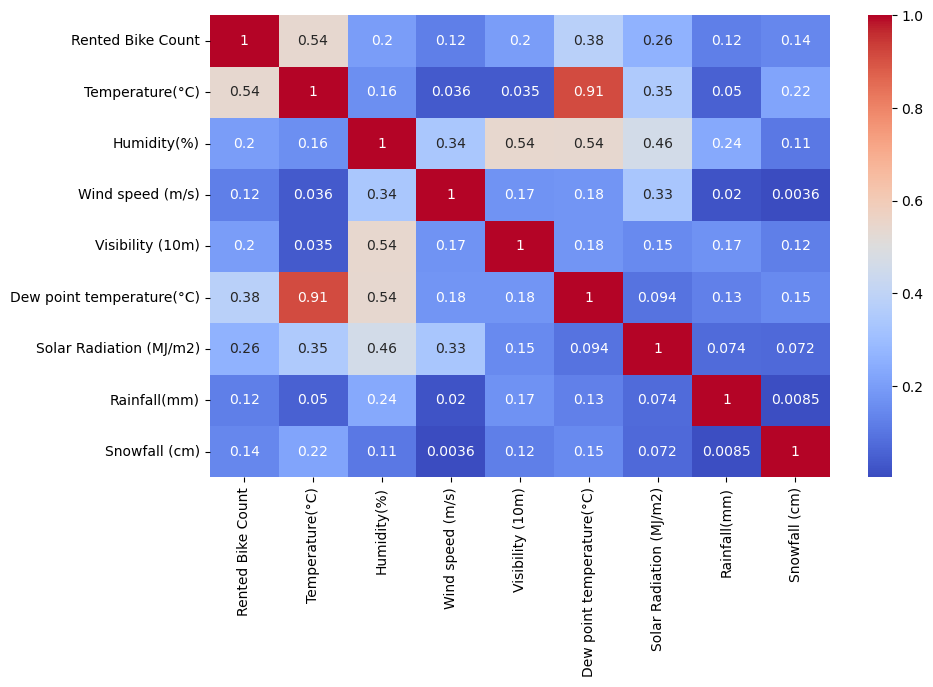

In [65]:
plt.figure(figsize=(10,6))
sns.heatmap(abs(bike_df.corr()), cmap='coolwarm', annot=True)  
plt.show()

#### Now handeling categorical features by feature encoding
#### i.e. using one hot encoding (get dummies) or Data encoding method.

In [67]:
new_bike_df = pd.get_dummies(bike_df, drop_first=True, sparse=True)

In [68]:
new_bike_df.head(2)

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254             -5.2           37               2.2   
1                204             -5.5           38               0.8   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  Hour_Evening  ...  month_February  \
0           0.0            0.0             0  ...               0   
1           0.0            0.0             0  ...               0   

   month_January  month_July  month_June  month_March  month_May  \
0              1           0           0            0          0   
1              1           0           0            0          0   

   month_November  month_October  month_September  week_Weekend  
0               0              0                0             0  
1               0              0                0             0  

[2 rows x 30 columns]

In [69]:

new_bike_df.shape

(8760, 30)

### Model implementation

#### Since we know our Dependent feature is positivley skewed so for the better model prediction we have to Normalize it.

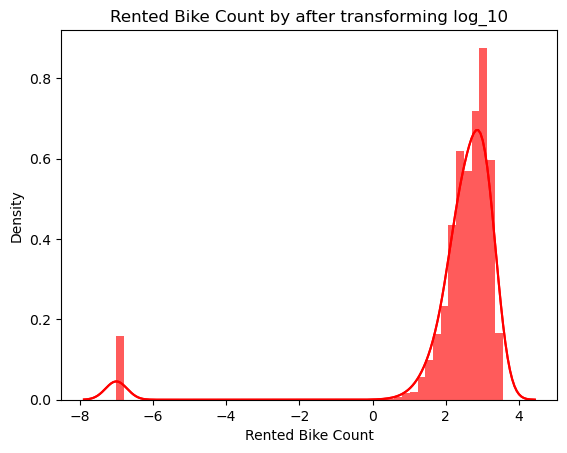

In [72]:
sns.distplot(np.log10(new_bike_df['Rented Bike Count']+0.0000001),color='red').set_title("Rented Bike Count by after transforming log_10")
plt.show()

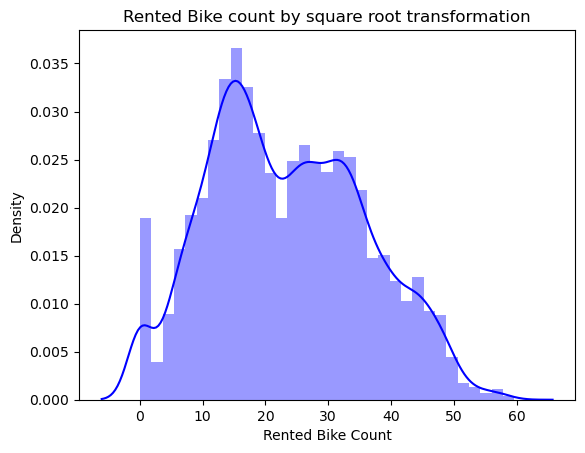

In [73]:
sns.distplot(np.sqrt(new_bike_df['Rented Bike Count']), color= 'blue').set_title('Rented Bike count by square root transformation')
plt.show()

In [74]:
x= new_bike_df.drop(columns=['Rented Bike Count'])

In [75]:
x.head()

Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0             -5.2           37               2.2              2000   
1             -5.5           38               0.8              2000   
2             -6.0           39               1.0              2000   
3             -6.2           40               0.9              2000   
4             -6.0           36               2.3              2000   

   Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                      -17.6                      0.0           0.0   
1                      -17.6                      0.0           0.0   
2                      -17.7                      0.0           0.0   
3                      -17.6                      0.0           0.0   
4                      -18.6                      0.0           0.0   

   Snowfall (cm)  Hour_Evening  Hour_Morning  ...  month_February  \
0            0.0             0             0  ...               0   
1            0.0             0             0  ...               0   
2            0.0             0             0  ...               0   
3            0.0             0             0  ...               0   
4            0.0             0             0  ...               0   

   month_January  month_July  month_June  month_March  month_May  \
0              1           0           0            0          0   
1              1           0           0            0          0   
2              1           0           0            0          0   
3              1           0           0            0          0   
4              1           0           0            0          0   

   month_November  month_October  month_September  week_Weekend  
0               0              0                0             0  
1               0              0                0             0  
2               0              0                0             0  
3               0              0                0             0  
4               0              0                0             0  

[5 rows x 29 columns]

In [76]:
x= x.drop(columns=['Dew point temperature(°C)'])

In [77]:
y = np.sqrt(new_bike_df['Rented Bike Count'])
     

### Spliting Data for Traning and Testing

In [78]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=10)

In [80]:
xtrain.head(10)  

Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
1036             -6.4           46               0.8              1993   
302              -4.7           27               2.9              1883   
6773             16.3           66               0.5              2000   
6354             35.4           40               1.0              2000   
5784             29.2           50               1.1              2000   
5542             28.0           76               1.5              1542   
1925             -1.8           44               0.5              1862   
1112              1.2           68               0.6               411   
324              -4.9           34               1.3              1768   
4129             15.9           71               1.1              1312   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Hour_Evening  \
1036                     0.00           0.0            0.0             0   
302                      1.12           0.0            0.0             0   
6773                     0.00           0.0            0.0             0   
6354                     0.34           0.0            0.0             1   
5784                     0.00           0.0            0.0             0   
5542                     0.00           0.0            0.0             1   
1925                     0.00           0.0            0.0             0   
1112                     0.00           0.0            0.0             0   
324                      0.60           0.0            0.0             0   
4129                     0.00           0.0            0.0             0   

      Hour_Morning  Hour_Night  ...  month_February  month_January  \
1036             0           1  ...               0              1   
302              0           0  ...               0              0   
6773             0           1  ...               0              0   
6354             0           0  ...               0              0   
5784             0           1  ...               0              0   
5542             0           0  ...               0              0   
1925             0           1  ...               1              0   
1112             1           0  ...               0              1   
324              0           0  ...               0              0   
4129             0           1  ...               0              0   

      month_July  month_June  month_March  month_May  month_November  \
1036           0           0            0          0               0   
302            0           0            0          0               0   
6773           0           0            0          0               0   
6354           0           0            0          0               0   
5784           1           0            0          0               0   
5542           1           0            0          0               0   
1925           0           0            0          0               0   
1112           0           0            0          0               0   
324            0           0            0          0               0   
4129           0           0            0          1               0   

      month_October  month_September  week_Weekend  
1036              0                0             1  
302               0                0             0  
6773              0                1             1  
6354              0                0             0  
5784              0                0             0  
5542              0                0             0  
1925              0                0             0  
1112              0                0             0  
324               0                0             0  
4129              0                0             0  

[10 rows x 28 columns]

In [81]:
ytrain.head()

1036     6.855655
302     15.491933
6773    12.845233
6354    50.279220
5784    28.460499
Name: Rented Bike Count, dtype: float64

In [83]:
ytest.head()

389      5.567764
8461    30.083218
3588    37.080992
5086    33.271610
3366    20.346990
Name: Rented Bike Count, dtype: float64

In [84]:
ytrain.shape

(7008,)

In [85]:
ytest.shape

(1752,)

#### Creating a functions to train and evaluate the model with different parameters like MSE , RMSE, R2 Score, Best_params, Best score, Coefficient , intercept and feature importances

In [86]:
# Appending all models parameters to the corrosponding list
mean_absolut_error = []
mean_sq_error=[]
root_mean_sq_error=[]
training_score =[]
r2_list=[]
adj_r2_list=[]
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


def score_metrix (model,X_train,X_test,Y_train,Y_test):

  '''
    train the model and gives mae, mse,rmse,r2,adj r2 score of the model
    
  '''
  #training the model
  model.fit(X_train,Y_train)

  # Training Score
  training  = model.score(X_train,Y_train)
  print("Training score  =", training)

  try:
      # finding the best parameters of the model if any 
    print(f"The best parameters found out to be :{model.best_params_} \nwhere model best score is:  {model.best_score_} \n")
  except:
    pass
    

  #predicting the Test set and evaluting the models 

  if model == LinearRegression() or model == Lasso() or model == Ridge():
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test**2,Y_pred**2)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test**2,Y_pred**2)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score
    
    r2 = r2_score(Y_test**2,Y_pred**2)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test**2,Y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')
  
  else:
    # for tree base models
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test,Y_pred)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test,Y_pred)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score
    
    r2 = r2_score(Y_test,Y_pred)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test,Y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

    try:
      
      # ploting the graph of feature importance
      
      best = model.best_estimator_
      features = X_train.columns
      importances = best.feature_importances_
      indices = np.argsort(importances)
      plt.figure(figsize=(10,15))
      plt.title('Feature Importance')
      plt.barh(range(len(indices)), importances[indices], color='red', align='center')
      plt.yticks(range(len(indices)), [features[i] for i in indices])
      plt.xlabel('Relative Importance')
      plt.show()
    
    except:
      pass
  
  # Here we appending the parameters for all models 
  mean_absolut_error.append(MAE)
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  training_score.append(training)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)

  print('*'*80)
  # print the cofficient and intercept of which model have these parameters and else we just pass them
  try :
    print("coefficient \n",model.coef_)
    print('\n')
    print("Intercept  = " ,model.intercept_)
  except:
    pass
  print('\n')
  print('*'*20, 'ploting the graph of Actual and predicted only with 80 observation', '*'*20)

  # ploting the graph of Actual and predicted only with 80 observation for better visualisation which model have these parameters and else we just pass them
  try:
    # ploting the line graph of actual and predicted values  
    plt.figure(figsize=(15,7))
    plt.plot((Y_pred)[:80])
    plt.plot((np.array(Y_test)[:80]))
    plt.legend(["Predicted","Actual"])
    plt.show()
  except:
    pass

### Model 1:  Linear Regression model

Training score  = 0.7031168479271276
MAE : 5.256832985963906
MSE : 44.35376150715582
RMSE : 6.659861973581421
R2 : 0.7161594175703074
Adjusted R2 :  0.7115468021854953 

********************************************************************************
coefficient 
 [ 5.14940824e-01 -1.60847945e-01  1.58427497e-01  4.73815016e-04
 -4.10264161e-01 -1.53176051e+00  1.92997496e-01  7.31743738e+00
  3.49826484e+00 -3.20286654e+00 -2.99804972e+00 -3.65497680e+00
 -7.77576392e+00  2.71595480e+00  2.80909776e+01 -2.32980211e+00
 -8.22718544e-01  1.64703992e-01 -4.94031472e-01  4.38354159e-01
 -1.80821191e-01  4.28441282e+00  3.96743044e-01  1.72452283e+00
  6.05512430e-01  2.08197536e+00 -4.89976098e-02 -6.51584135e-01]


Intercept  =  -0.1911980167566938


******************** ploting the graph of Actual and predicted only with 80 observation ********************


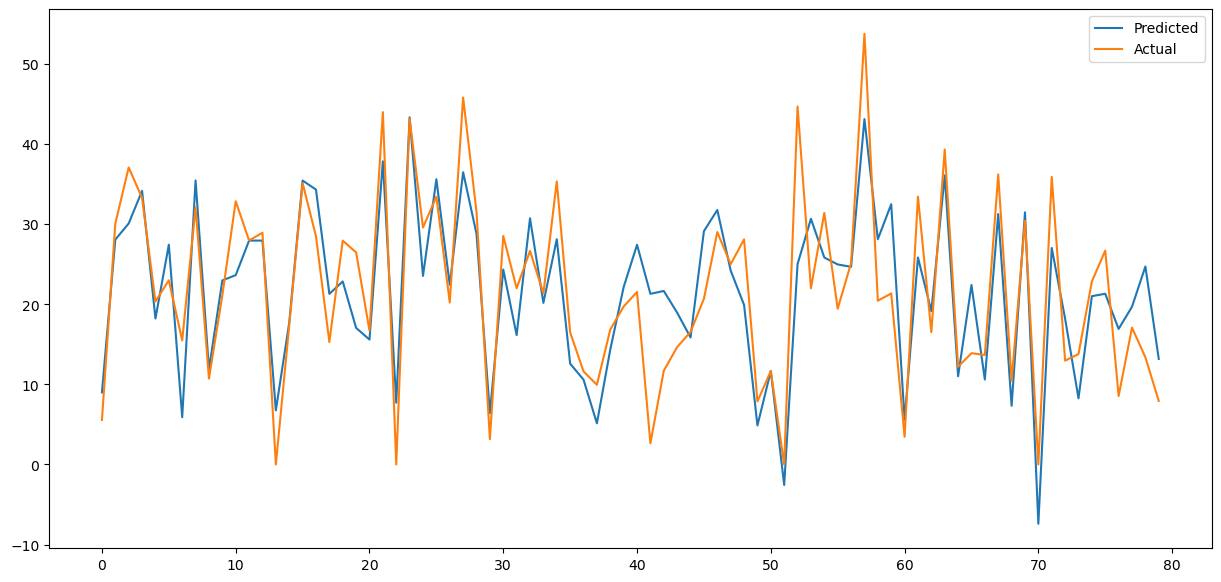

In [87]:
score_metrix(LinearRegression(), xtrain, xtest, ytrain, ytest)

The linear regression model above demonstrates satisfactory outcomes.

----> Based on the training score, we can conclude that the model is significantly overfit.

----> To enhance the accuracy of the model, we can scale or transform the training data using methods such as min-max scaler, standard scalar, or power transformer.

Power transformations are especially useful when dealing with skewed features, and the model is sensitive to the distribution's symmetry.

The fit(data) method is utilized to determine the mean and standard deviation for a particular feature and is subsequently used for scaling. The transform(data) method is employed to perform scaling using the mean and standard deviation obtained through the fit() method.

In [88]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
xtrain_trans = pt.fit_transform(xtrain)      # fit transform the training set
xtest_trans = pt.transform(xtest)             #tranform the test set
     

Training score  = 0.7358707972413249
MAE : 5.062774637284666
MSE : 41.52977444529125
RMSE : 6.444359894147071
R2 : 0.7342314390894797
Adjusted R2 :  0.7299125071652228 

********************************************************************************
coefficient 
 [ 5.61822803e+00 -1.87825798e+00  1.92424550e-01  3.52738715e-01
  7.77994109e-01 -3.15126857e+00  1.61361164e-01  3.70269979e+00
  1.29995677e+00 -1.06490861e+00 -1.24617734e+00 -1.47237748e+00
 -3.38114045e+00  5.81846210e-01  5.09717798e+00 -5.45365806e-01
 -2.95892271e-01  1.14990091e-02 -1.93466504e-01  2.17226406e-03
 -2.89652266e-01  1.03408433e+00 -1.35548401e-01  4.57829697e-01
  2.31829971e-02  3.82541530e-01 -5.31337743e-02 -3.49686409e-01]


Intercept  =  23.598336127191143


******************** ploting the graph of Actual and predicted only with 80 observation ********************


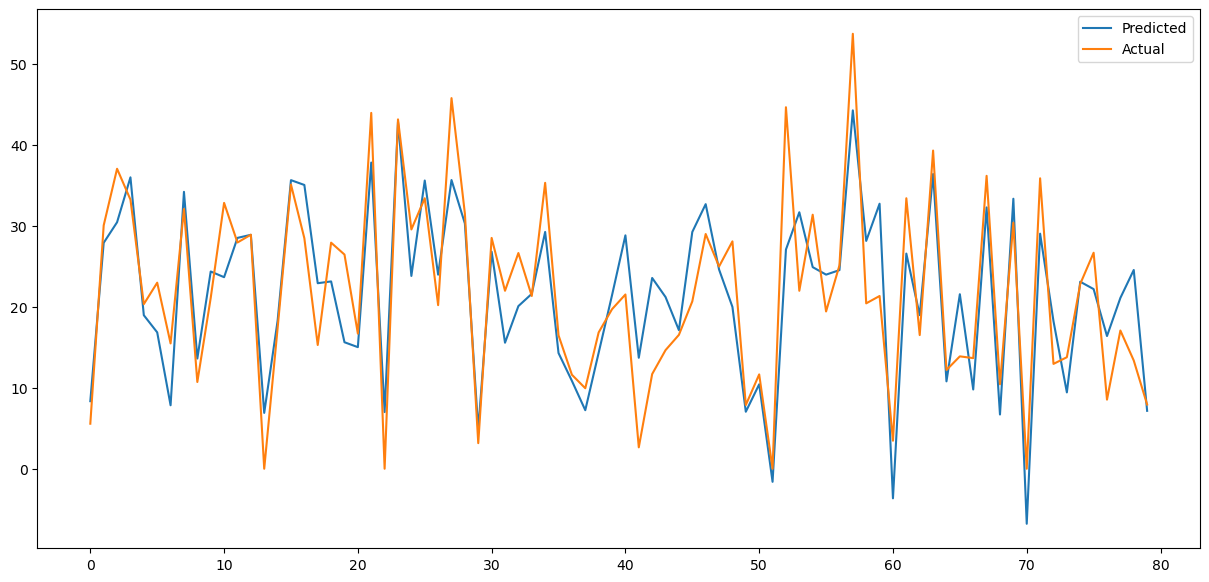

In [89]:
score_metrix(LinearRegression(), xtrain_trans, xtest_trans, ytrain, ytest)

#### power transformer operation we have increased our training accuracy by some percent.

### Model 2 - Build Linear Regression model by using polynomial features

In [91]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)                                
poly_xtrain = poly.fit_transform(xtrain_trans)                 
poly_xtest = poly.transform(xtest_trans)                     
     

Training score  = 0.8514176744024103
MAE : 3.7032465524929217
MSE : 24.626439154483258
RMSE : 4.962503315312067
R2 : 0.8424038323863426
Adjusted R2 :  0.7903108742465699 

********************************************************************************
coefficient 
 [-2.42055653e+08  3.80350733e+00 -2.24863317e+00  2.07888675e-01
  8.66563759e-02 -8.17524798e-01  1.56993174e+00  8.75444129e+11
 -7.97028528e+11 -5.39714366e+10 -3.48062986e+11  1.98781223e+11
 -9.10339367e+11 -4.47588625e+10 -1.13748462e+12  3.75121270e+11
 -3.07372076e+11 -5.82770828e+10  1.35837978e+11  1.19867227e+11
 -4.08967101e+11  7.13816857e+10  5.61047037e+11 -4.01360812e+11
  3.06946549e+11 -2.50091104e+11 -2.77075671e+11 -1.12458243e+11
  1.82171804e+11 -2.86788750e+00  4.24423218e-01 -7.81192780e-02
  6.52954102e-01  4.62203979e-01 -5.47062159e-02 -1.07821655e+00
  1.31826210e+00 -1.44570160e+00 -3.32996368e-01 -4.26783562e-01
 -2.06634903e+00 -4.51168919e+00 -1.26311493e+00  2.72954178e+00
  3.44360352e-01 -

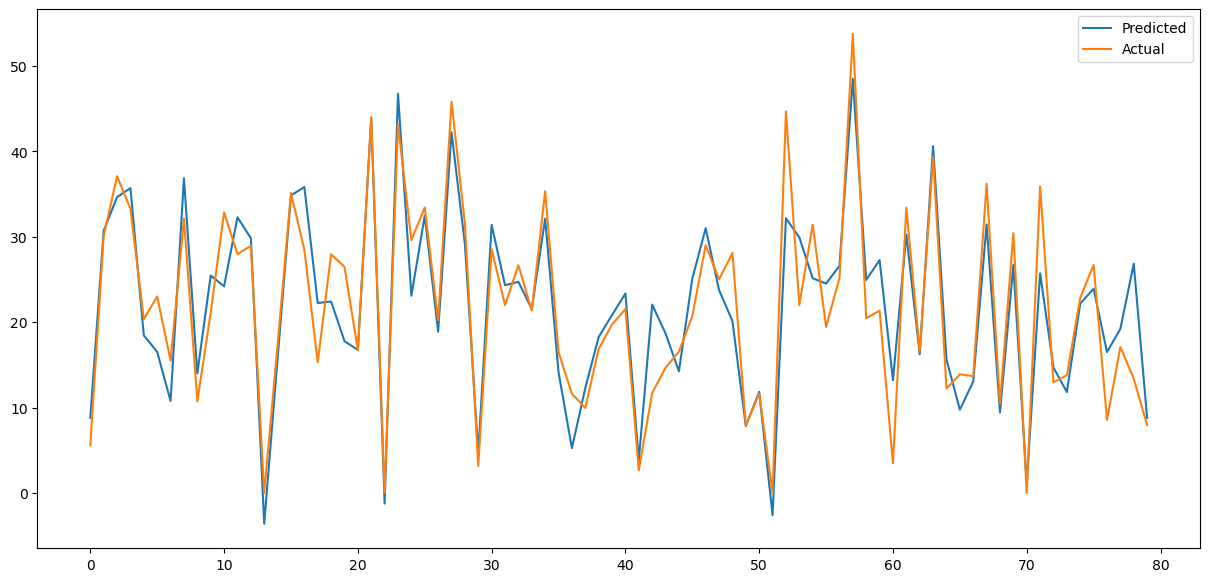

In [92]:
score_metrix(LinearRegression(), poly_xtrain,poly_xtest,ytrain,ytest)

### Regularization
#### Regularization is one of the most important concepts of machine learning. It is a technique to prevent the model from overfitting by adding extra information to it.

#### Two techniques of regularization are = 1) Lasso (l1 norm) and 2) Ridge regression (L2 norm)

### Model 3 - lasso regression

In [94]:
L1 = Lasso() #creating variable
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]} #lasso parameters 
lasso_cv = GridSearchCV(L1, parameters, cv=5) #using gridsearchcv and cross validate the model
     

Training score  = 0.7358435727410344
The best parameters found out to be :{'alpha': 0.01} 
where model best score is:  0.7329299487993713 

MAE : 5.061698499519291
MSE : 41.512360555936745
RMSE : 6.443008657136566
R2 : 0.734342878758378
Adjusted R2 :  0.7300257578095879 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


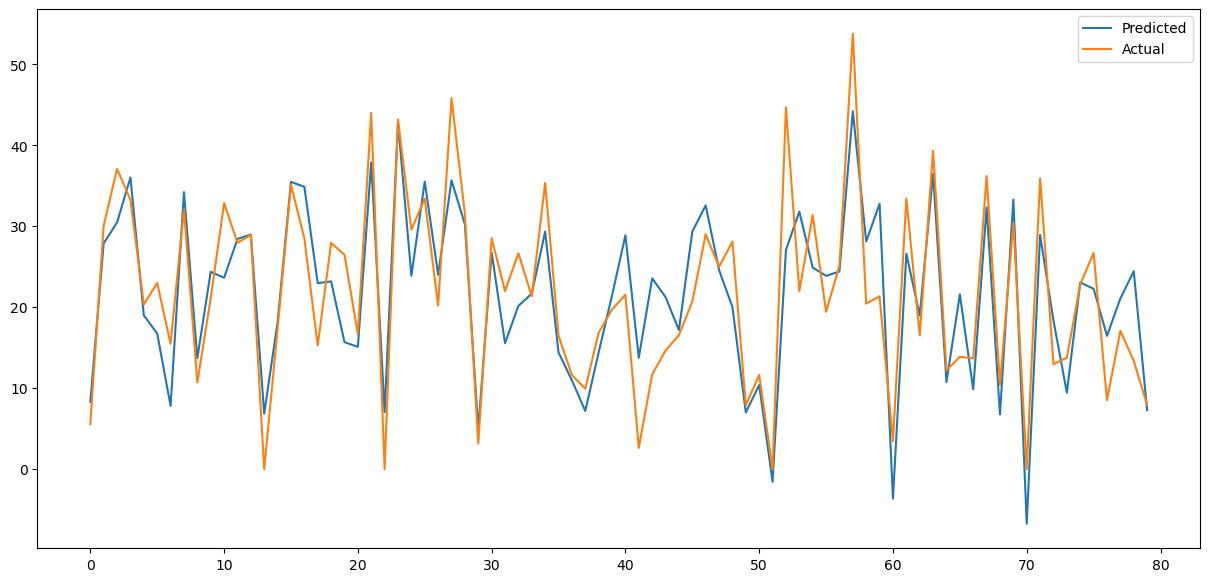

In [95]:
score_metrix(lasso_cv, xtrain_trans, xtest_trans, ytrain, ytest)

### Model 4 - Ridge regression

Training score  = 0.7358671502026775
The best parameters found out to be :{'alpha': 10} 
where model best score is:  0.732882411744482 

MAE : 5.062807136059968
MSE : 41.52017837206753
RMSE : 6.4436153184425535
R2 : 0.7342928488757146
Adjusted R2 :  0.7299749149050355 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


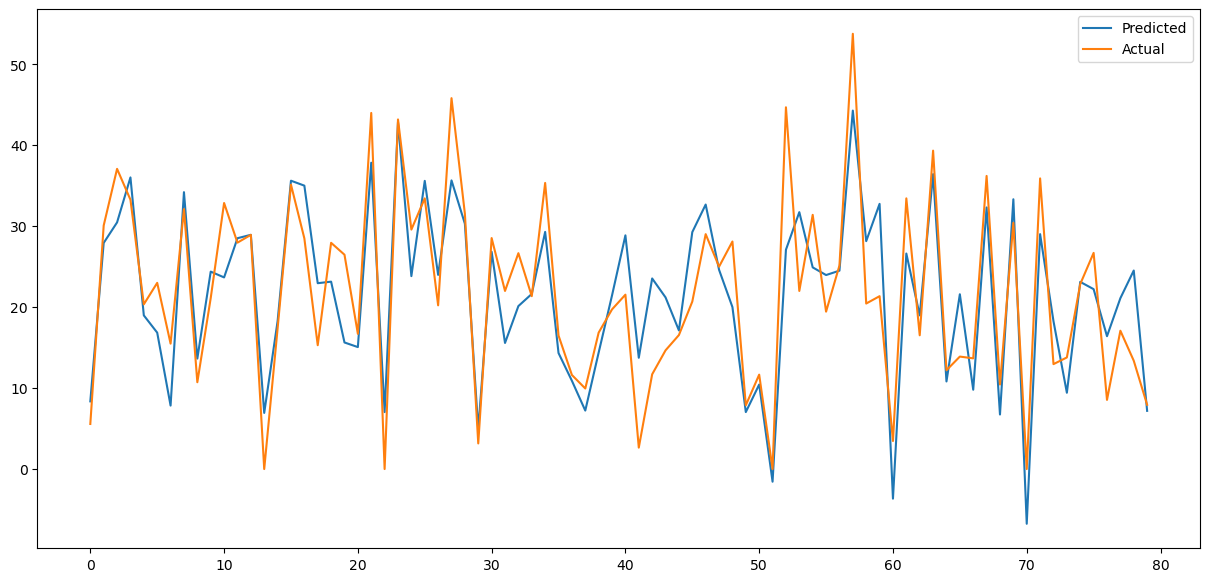

In [97]:
L2 = Ridge() 
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}       
L2_cv = GridSearchCV(L2, parameters, scoring='r2', cv=5)                                                                   
score_metrix(L2_cv,xtrain_trans,xtest_trans,ytrain,ytest)            

### Model 5 - Decission Tree

decission tree multicollinearity of features does not affect the model accuracy. So in previous models we have removed multicollinear features (such as "Dew Point Temperature").

In [99]:
new_x = new_bike_df.drop(columns='Rented Bike Count')               
new_y = new_bike_df['Rented Bike Count']                              
    

In [115]:
new_xtrain, new_xtest, new_ytrain, new_ytest = train_test_split(new_x, new_y, test_size= 0.20, random_state = 10)

In [116]:
new_xtrain.shape,   new_xtest.shape,   new_ytrain.shape,  new_ytest.shape

((7008, 29), (1752, 29), (7008,), (1752,))

In [117]:
from sklearn.tree import DecisionTreeRegressor

In [118]:
param_grid = {'criterion' : ["mse"],
              'splitter' : ["best", "random"],
              'max_depth' : [10,15,25, 'none'],
              'min_samples_split': [10,50,100],
              'max_features' :[24,35,40,49]}

# using grid search cv 
Dt_grid_search = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid,cv=2,n_jobs=-1)

/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with 

/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.w

/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.w

/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.w

Training score  = 0.8246305633079585
The best parameters found out to be :{'criterion': 'mse', 'max_depth': 10, 'max_features': 24, 'min_samples_split': 50, 'splitter': 'best'} 
where model best score is:  0.7594795895227828 

MAE : 194.7278665632221
MSE : 85363.18966798844
RMSE : 292.16979595431906
R2 : 0.7897762389551226
Adjusted R2 :  0.7862358852557606 



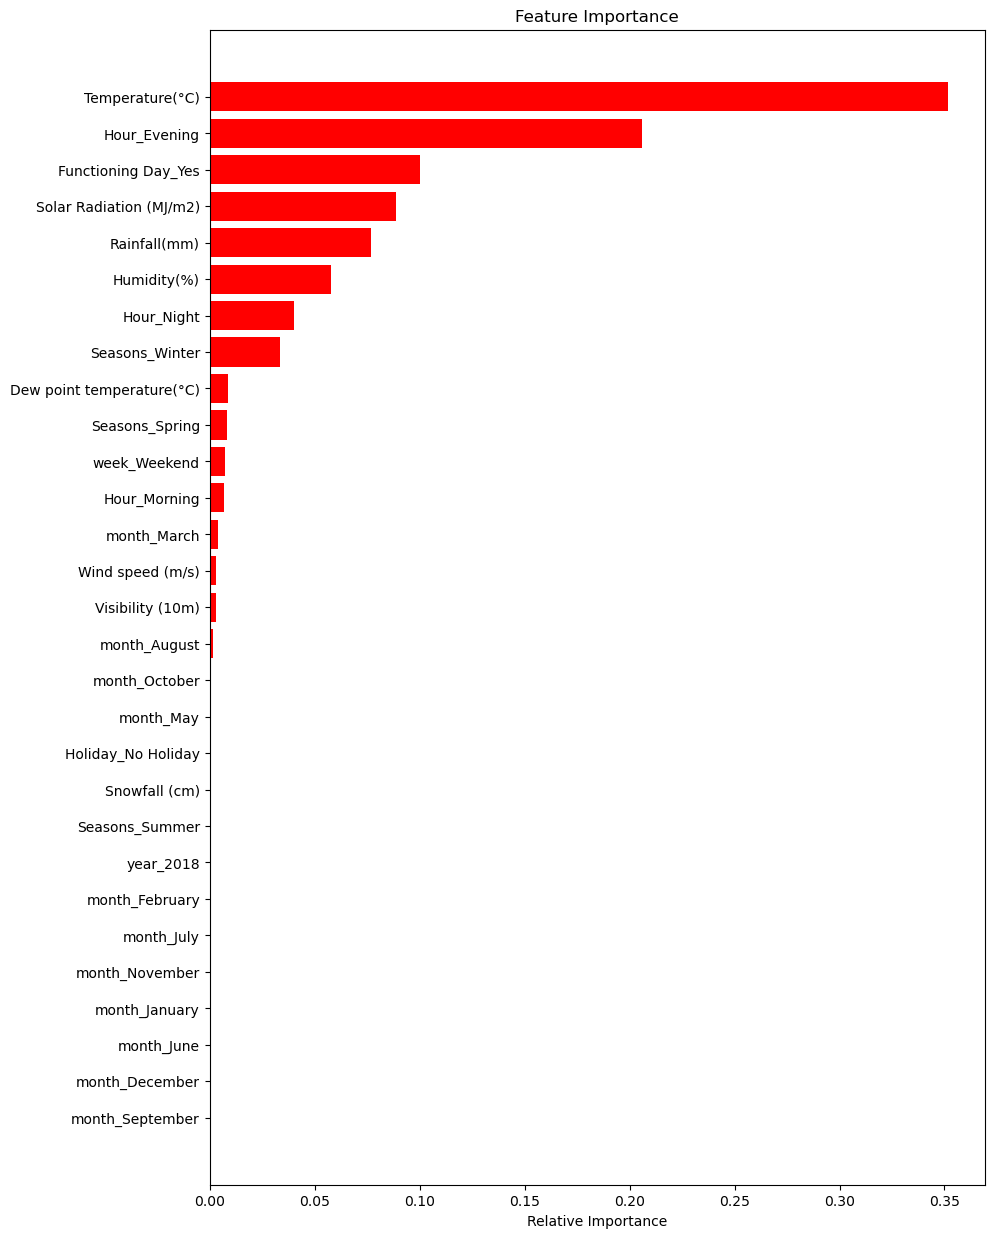

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


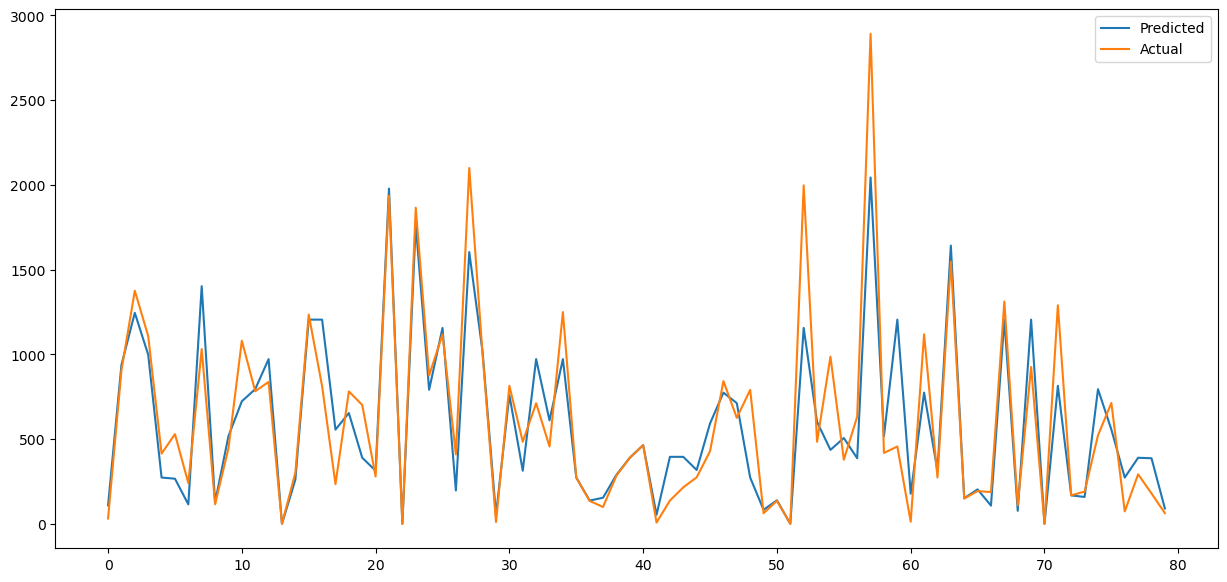

In [123]:
score_metrix(Dt_grid_search, new_xtrain,  new_xtest, new_ytrain,new_ytest)

### Model 6 - Random Forest Regression

In [106]:
from sklearn.ensemble import RandomForestRegressor
rf_param_grid ={"n_estimators":[50,100,150],                    
              'max_depth' : [10,15,20,25,'none'],
              'min_samples_split': [10,50,100],
              'max_features' :[24,35,40,49]}
Ranom_forest_Grid_search = GridSearchCV(RandomForestRegressor(),param_grid=rf_param_grid,n_jobs=-1,verbose=2)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.w

/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.w

/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.w

[CV] END max_depth=10, max_features=24, min_samples_split=10, n_estimators=50; total time=   1.0s
[CV] END max_depth=10, max_features=24, min_samples_split=10, n_estimators=150; total time=   3.4s
[CV] END max_depth=10, max_features=24, min_samples_split=100, n_estimators=100; total time=   2.1s
[CV] END max_depth=10, max_features=24, min_samples_split=100, n_estimators=150; total time=   3.3s
[CV] END max_depth=15, max_features=24, min_samples_split=10, n_estimators=150; total time=   5.0s
[CV] END max_depth=15, max_features=24, min_samples_split=50, n_estimators=150; total time=   5.1s
[CV] END max_depth=15, max_features=35, min_samples_split=50, n_estimators=150; total time=   0.1s
[CV] END max_depth=15, max_features=35, min_samples_split=100, n_estimators=50; total time=   0.1s
[CV] END max_depth=15, max_features=35, min_samples_split=100, n_estimators=100; total time=   0.1s
[CV] END max_depth=15, max_features=40, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END 

/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.w

/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.w

[CV] END max_depth=10, max_features=24, min_samples_split=10, n_estimators=100; total time=   2.0s
[CV] END max_depth=10, max_features=24, min_samples_split=50, n_estimators=50; total time=   1.0s
[CV] END max_depth=10, max_features=24, min_samples_split=50, n_estimators=150; total time=   3.2s
[CV] END max_depth=10, max_features=24, min_samples_split=100, n_estimators=150; total time=   3.1s
[CV] END max_depth=15, max_features=24, min_samples_split=10, n_estimators=150; total time=   5.0s
[CV] END max_depth=15, max_features=24, min_samples_split=50, n_estimators=150; total time=   4.7s
[CV] END max_depth=15, max_features=35, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=15, max_features=35, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=15, max_features=35, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=15, max_features=35, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max

/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.w

/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.w

[CV] END max_depth=10, max_features=24, min_samples_split=10, n_estimators=100; total time=   2.1s
[CV] END max_depth=10, max_features=24, min_samples_split=50, n_estimators=100; total time=   2.3s
[CV] END max_depth=10, max_features=24, min_samples_split=100, n_estimators=50; total time=   1.1s
[CV] END max_depth=10, max_features=24, min_samples_split=100, n_estimators=150; total time=   3.1s
[CV] END max_depth=10, max_features=49, min_samples_split=10, n_estimators=150; total time=   0.1s
[CV] END max_depth=10, max_features=49, min_samples_split=50, n_estimators=150; total time=   0.1s
[CV] END max_depth=10, max_features=49, min_samples_split=100, n_estimators=100; total time=   0.1s
[CV] END max_depth=15, max_features=24, min_samples_split=10, n_estimators=50; total time=   1.7s
[CV] END max_depth=15, max_features=24, min_samples_split=50, n_estimators=50; total time=   1.3s
[CV] END max_depth=15, max_features=24, min_samples_split=50, n_estimators=50; total time=   1.4s
[CV] END ma

/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.w

[CV] END max_depth=10, max_features=24, min_samples_split=10, n_estimators=100; total time=   2.1s
[CV] END max_depth=10, max_features=24, min_samples_split=50, n_estimators=100; total time=   2.1s
[CV] END max_depth=10, max_features=24, min_samples_split=100, n_estimators=50; total time=   1.0s
[CV] END max_depth=10, max_features=24, min_samples_split=100, n_estimators=100; total time=   2.1s
[CV] END max_depth=10, max_features=35, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=35, min_samples_split=50, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=35, min_samples_split=50, n_estimators=150; total time=   0.1s
[CV] END max_depth=10, max_features=35, min_samples_split=100, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=35, min_samples_split=100, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=40, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END m

/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.w

[CV] END max_depth=10, max_features=24, min_samples_split=10, n_estimators=100; total time=   2.1s
[CV] END max_depth=10, max_features=24, min_samples_split=50, n_estimators=100; total time=   2.2s
[CV] END max_depth=10, max_features=24, min_samples_split=100, n_estimators=50; total time=   1.0s
[CV] END max_depth=10, max_features=24, min_samples_split=100, n_estimators=150; total time=   3.2s
[CV] END max_depth=10, max_features=49, min_samples_split=10, n_estimators=150; total time=   0.1s
[CV] END max_depth=10, max_features=49, min_samples_split=50, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=49, min_samples_split=100, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=49, min_samples_split=100, n_estimators=100; total time=   0.1s
[CV] END max_depth=15, max_features=24, min_samples_split=10, n_estimators=50; total time=   1.6s
[CV] END max_depth=15, max_features=24, min_samples_split=10, n_estimators=150; total time=   5.3s
[CV] END 

/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.w

/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.w

/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.w

/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.w

[CV] END max_depth=10, max_features=24, min_samples_split=10, n_estimators=100; total time=   2.1s
[CV] END max_depth=10, max_features=24, min_samples_split=50, n_estimators=100; total time=   2.1s
[CV] END max_depth=10, max_features=24, min_samples_split=50, n_estimators=150; total time=   3.5s
[CV] END max_depth=10, max_features=35, min_samples_split=100, n_estimators=150; total time=   0.1s
[CV] END max_depth=10, max_features=40, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=40, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=40, min_samples_split=50, n_estimators=150; total time=   0.1s
[CV] END max_depth=10, max_features=40, min_samples_split=100, n_estimators=50; total time=   0.1s
[CV] END max

/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.w

/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.w

/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.w

[CV] END max_depth=10, max_features=24, min_samples_split=10, n_estimators=50; total time=   1.1s
[CV] END max_depth=10, max_features=24, min_samples_split=50, n_estimators=50; total time=   0.9s
[CV] END max_depth=10, max_features=24, min_samples_split=50, n_estimators=50; total time=   1.0s
[CV] END max_depth=10, max_features=24, min_samples_split=50, n_estimators=100; total time=   2.1s
[CV] END max_depth=10, max_features=24, min_samples_split=100, n_estimators=100; total time=   2.2s
[CV] END max_depth=10, max_features=35, min_samples_split=50, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=35, min_samples_split=50, n_estimators=150; total time=   0.1s
[CV] END max_depth=10, max_features=35, min_samples_split=100, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=35, min_samples_split=100, n_estimators=150; total time=   0.1s
[CV] END max_depth=10, max_features=40, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max

/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.w

/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.w

/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.w

/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.w

/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.w

/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.w

/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.w

[CV] END max_depth=25, max_features=40, min_samples_split=50, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=40, min_samples_split=50, n_estimators=150; total time=   0.3s
[CV] END max_depth=25, max_features=40, min_samples_split=100, n_estimators=100; total time=   0.2s
[CV] END max_depth=25, max_features=49, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END max_depth=25, max_features=49, min_samples_split=10, n_estimators=150; total time=   0.2s
[CV] END max_depth=25, max_features=49, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=25, max_features=49, min_samples_split=50, n_estimators=150; total time=   0.1s
[CV] END max_depth=25, max_features=49, min_samples_split=100, n_estimators=100; total time=   0.2s
[CV] END max_depth=none, max_features=24, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=none, max_features=24, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] EN

/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.w

/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.w

/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.w

/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.w

[CV] END max_depth=10, max_features=49, min_samples_split=100, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=49, min_samples_split=100, n_estimators=150; total time=   0.1s
[CV] END max_depth=15, max_features=24, min_samples_split=10, n_estimators=100; total time=   4.1s
[CV] END max_depth=15, max_features=24, min_samples_split=50, n_estimators=100; total time=   3.5s
[CV] END max_depth=15, max_features=24, min_samples_split=100, n_estimators=50; total time=   1.7s
[CV] END max_depth=15, max_features=24, min_samples_split=100, n_estimators=100; total time=   3.0s
[CV] END max_depth=15, max_features=35, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=15, max_features=35, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=15, max_features=35, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, max_features=35, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END m

/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.w

/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.w

Training score  = 0.9462605232175477
The best parameters found out to be :{'max_depth': 25, 'max_features': 24, 'min_samples_split': 10, 'n_estimators': 150} 
where model best score is:  0.8366238371741636 

MAE : 163.50523456322918
MSE : 64531.58907766364
RMSE : 254.03068530723536
R2 : 0.8410781811823942
Adjusted R2 :  0.8384017974740837 



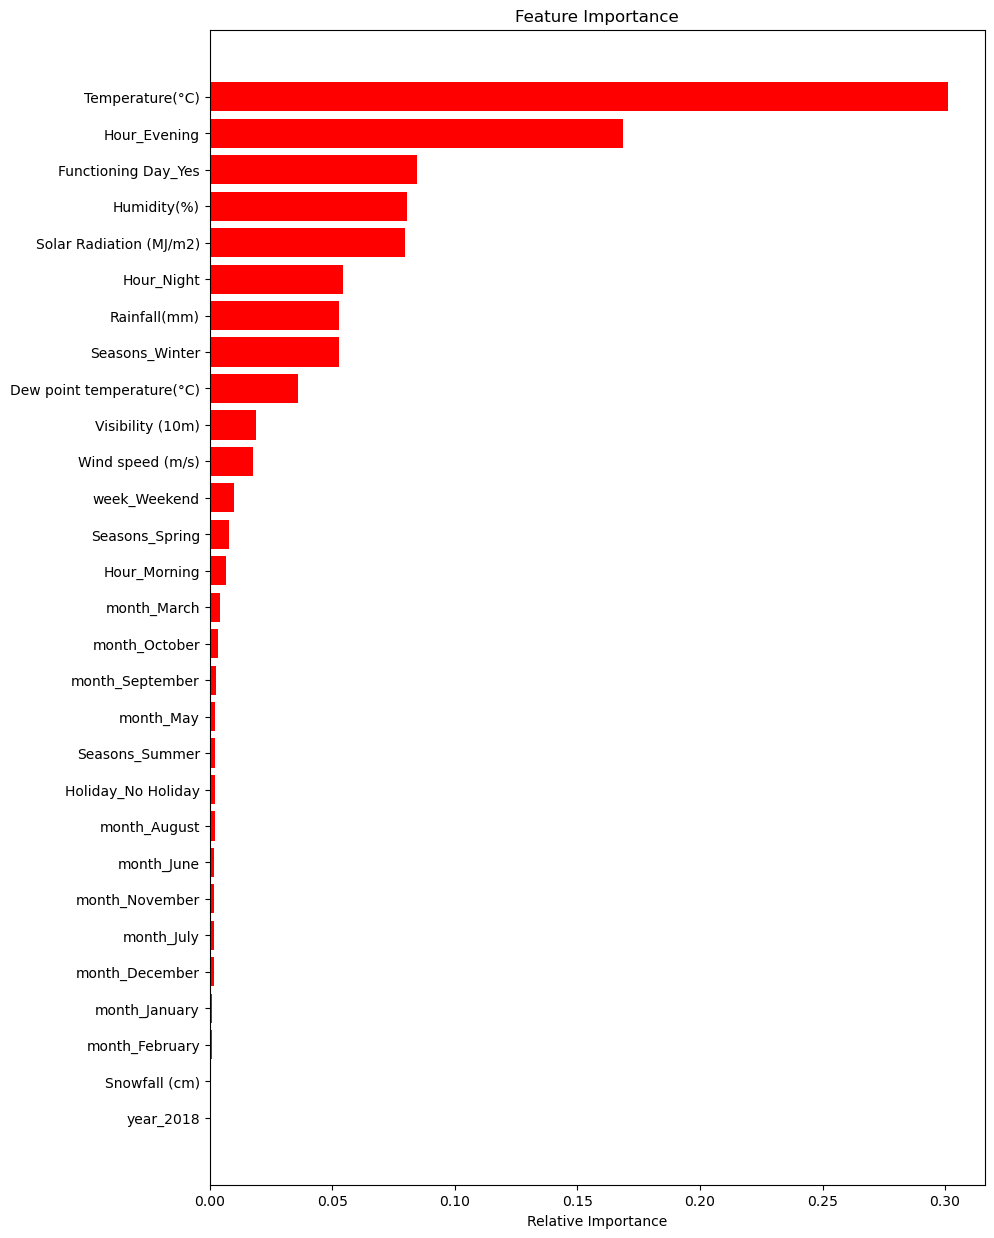

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


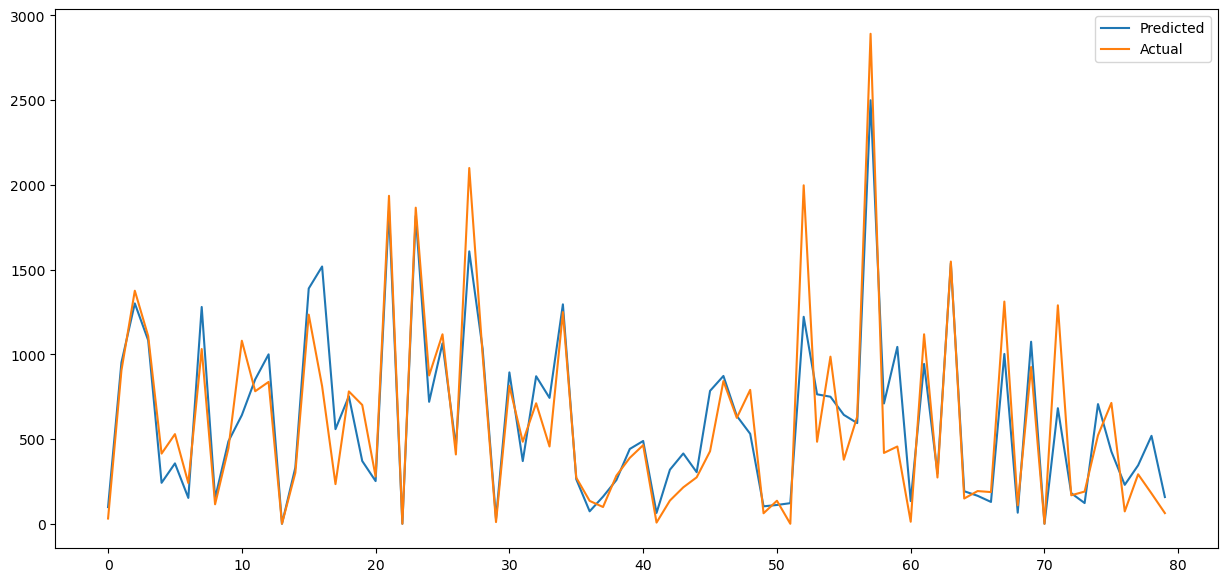

In [125]:
score_metrix(Ranom_forest_Grid_search, new_xtrain, new_xtest, new_ytrain, new_ytest)

## Conclusions of Project

#### EDA Insights

1. The summer season sees the highest number of bike rentals, while the winter season sees the lowest.
2. Non-holiday days account for 98% of bike rentals, indicating that most users rent bikes for their daily commute to work.
3. Bike rentals peak in the temperature range of 15 to 30 degrees.
4. Bike rentals are highest when there is no snowfall or rainfall.
5. Most bikes are rented when humidity is between 30% and 70%.
6. Bike rental count gradually increases from 6am to 10am, possibly due to employees heading to work, and then slightly decreases until 4pm before increasing again until 8pm, likely when employees return home.
7. The 18th hour (6pm) sees the highest number of bike rentals, while the 4th hour (4am) sees the lowest.
8. High visibility conditions see the most bike rentals.
9. Demand for rented bikes increased in 2018 compared to the previous year, possibly indicating increased awareness and adoption of bike rental services.

#### ML models observation

#### model 1 Linear Regression
#### Evaluation matrices :
                              Training score = 0.7031168479271276
                              MAE : 5.256832985963903
                              MSE : 44.35376150715583 
                              RMSE : 6.659861973581422
                              R2 : 0.7161594175703074
                              Adjusted R2 :  0.7115468021854953

#### model 2 LR By polynomial features
#### Evaluation matrices :
                              Training score  = 0.8514176478921974
                              MAE : 3.7037638918076135
                              MSE : 24.62886174549538
                              RMSE : 4.962747398920822
                              R2 : 0.8423883290869492
                              Adjusted R2 :  0.7902902463763283 

#### model 3 Lasso Regression 
#### Evaluation matrices :
                               Training score  = 0.7358435727410344
                               The best parameters found out to be :{'alpha': 0.01} 
                               where model best score is:  0.7329299487993713 

                               MAE : 5.06169849951929
                               MSE : 41.51236055593674
                               RMSE : 6.443008657136566
                               R2 : 0.7343428787583781
                               Adjusted R2 :  0.7300257578095879 

#### model 4 Ridge Regression 
#### Evaluation matrices :
                               Training score  = 0.7358671502026775
                               The best parameters found out to be :{'alpha': 10} 
                                  where model best score is:  0.7328824117444819 

                               MAE : 5.062807136059967
                               MSE : 41.52017837206752
                               RMSE : 6.443615318442553
                               R2 : 0.7342928488757146
                               Adjusted R2 :  0.7299749149050355 

#### model 5 Decision Tree 
#### Evaluation matrices :
                               Training score  = 0.8280441022565106
                                    The best parameters found out to be :{'criterion': 'mse', 'max_depth': 10, 'max_features': 24, 'min_samples_split': 50, 'splitter': 'best'} 
                                  where model best score is:  0.762736405229868 
        
                                  MAE : 198.53362785980028
                                  MSE : 91206.7120267727
                                  RMSE : 302.004490077172
                                  R2 : 0.7753854078159468
                                  Adjusted R2 :  0.771602699817493   

#### Model 6 Random Forest Regression 
#### Evaluation matrices :
              Fitting 5 folds for each of 180 candidates, totalling 900 fits
              Training score  = 0.9462585885010566
              The best parameters found out to be :{'max_depth': 25, 'max_features': 24, 'min_samples_split': 10, 'n_estimators': 150} 
              where model best score is:  0.8368912182495061 

              MAE : 162.8700295318971
              MSE : 63993.77680319597
              RMSE : 252.96991284181598
              R2 : 0.8424026504239306
              Adjusted R2 :  0.8397485719467495 

#####  From analyzing the model insights, we can conclude that the Random Forest Regression model performs the best in predicting bike rental counts with an R2 score of 0.842402, while the Linear Regression model performs the worst with an R2 score of 0.7161594175703074. Visualizations of actual versus predicted values have been created for all six models, and feature importance graphs have been used to explain each model. Furthermore, temperature and hour are the two most significant factors in predicting bike rental counts according to all six models, making them useful features for modeling purposes.